In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, re
from tqdm.notebook import tqdm

In [2]:
regex = re.compile(r'\d+')

In [3]:
data_folder = os.path.join('/', 'Users','cdesio','UoB','leakage')

In [4]:
extracted_folder = os.path.join(data_folder, 'extracted')

In [5]:
fnames = os.listdir(extracted_folder)

In [6]:
Temps=[]
Tints = []

In [7]:
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)

In [8]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [9]:
def bad_pixel_mask(array):
    mean = np.mean(array)
    if np.any(array)<= mean-2000:
        bad = np.where(array<=mean-2000)[0]
        for pix in bad:
            if pix<len(array)-1:
                array[pix] = np.mean([array[pix-1], array[pix+1]])
            else:
                array[pix]=array[pix-1]
    if np.any(array)>= mean+2000:
        bad_up = np.where(array>=mean+2000)[0]
        for px in bad_up:
            if px<len(array)-1:
                array[px] = np.mean([array[px-1], array[px+1]])
            else:
                array[px] = array[px-1]
    return array

def ravel_nested(ax):
    return np.vstack(ax).reshape(20, 400)



In [36]:
mean_pix_by_pix = np.empty((129,20))
std_pix_by_pix = np.empty((129,20))
temps = np.zeros((129,20))
tints = np.zeros((129,20))
for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(np.float(f.split('_')[0][1:]),20)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),20)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    corrected = np.apply_along_axis(bad_pixel_mask, 0, stacked)
    #print(corrected)
    
    
    mean_pix_by_pix[i]= np.mean(np.mean(corrected, axis=0), axis=1)
    std_pix_by_pix[i]= np.sqrt(np.sum(corrected[i]**2, axis=1))/400


rad_dam = np.array([50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1])

rad_dam = np.tile(rad_dam, 129).reshape(129, 20)

df = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'rad_dam':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})


In [23]:
from ROOT import TH1F, TCanvas, TF1, gStyle

Welcome to JupyROOT 6.18/04


In [34]:
def gaus_fit_avg(arr, n_bins = 3, histo_min = np.min(arr), histo_max = np.max(arr), print_sigma=True):
    
    mean = np.mean(arr)
    histo = TH1F("",'',n_bins,histo_min,histo_max)
    for i in arr:
        histo.Fill(i)
    canvas = TCanvas()
    f = TF1("f","gaus")
    #f.FixParameter(1,mean)
    histo.Fit(f, "S")
    #histo.GetXaxis().SetTitle("prediction error (mm)");
    yax=histo.GetYaxis()
    gStyle.SetOptStat(1)
    gStyle.SetOptFit(1)
    gStyle.SetStatY(0.9)
    gStyle.SetStatX(0.9)
    gStyle.SetStatW(0.15)
    gStyle.SetStatH(0.15)
    histo.Draw()
    canvas.Draw()
    if print_sigma:
        mean_graph = f.GetParameter(1)
        sigma = f.GetParameter(2)
        err = f.GetParError(2)
        print('Mean: {:.5f} Sigma: {:.5f} ± {:.5f}'.format(mean_graph, sigma, err))
    return histo, canvas, sigma, err

Mean: 8767.05021 Sigma: 2555.16085 ± 11681.92446


(<ROOT.TH1F object at 0x7fa72f540620>,
 <ROOT.TCanvas object ("c1_n5") at 0x7fa72eba4220>,
 2555.160852283275,
 11681.924456702664)

 FCN=8.50231e-11 FROM HESSE     STATUS=NOT POSDEF     16 CALLS         104 TOTAL
                     EDM=1.69845e-10    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.25562e+01   5.49768e+01   3.69650e-04   1.72886e-07
   2  Mean         8.76705e+03   1.16096e+04   7.96617e-02  -2.04578e-08
   3  Sigma        2.55516e+03   1.16819e+04   6.81753e-06  -2.15069e-04


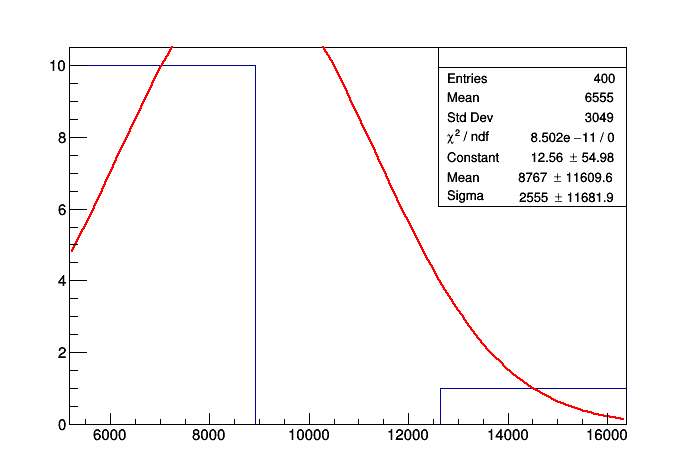

In [35]:
gaus_fit_avg(arr)

In [37]:
def select_fit(test_y):
    for i, y in enumerate(test_y):
        if y>=15000:
            break
    return i

-20.0 1
cut>2


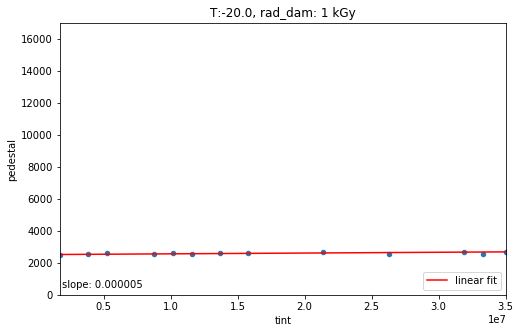

-20.0 2
cut>2


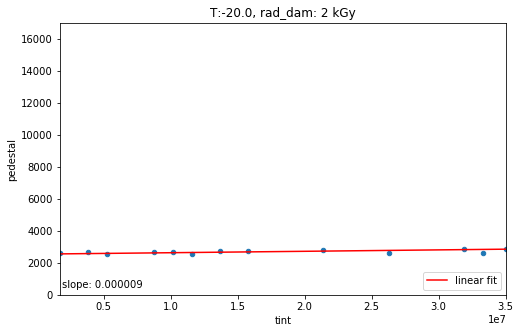

-20.0 3
cut>2


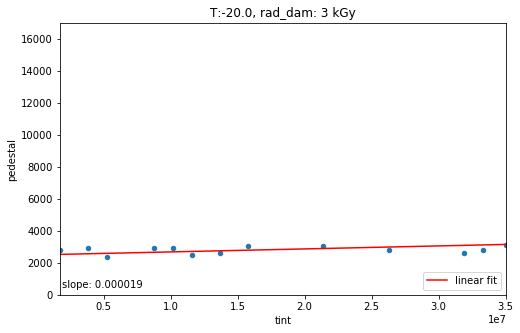

-20.0 4
cut>2


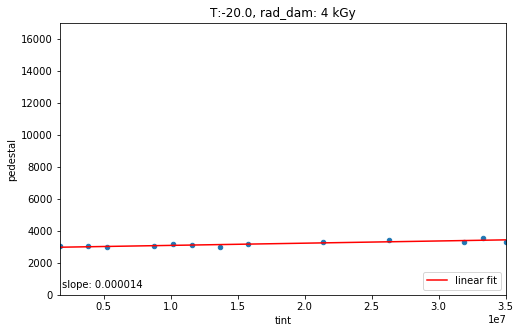

-20.0 5
cut>2


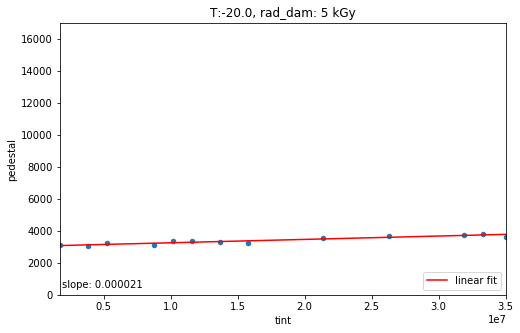

-20.0 6
cut>2


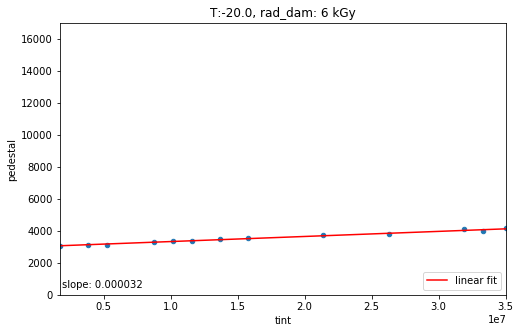

-20.0 8
cut>2


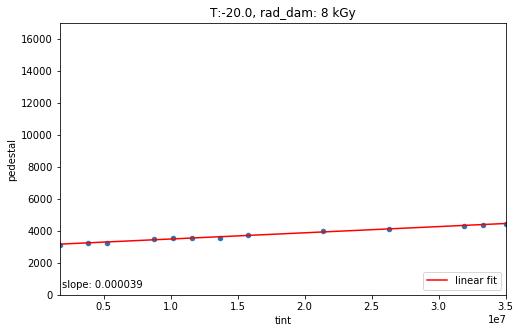

-20.0 9
cut>2


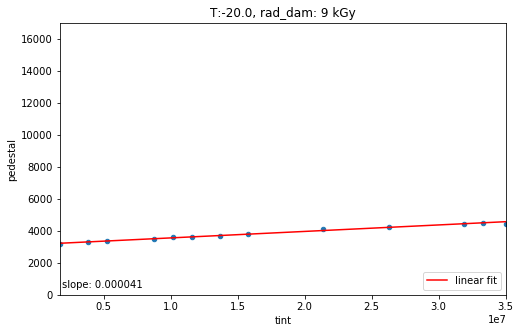

-20.0 10
cut>2


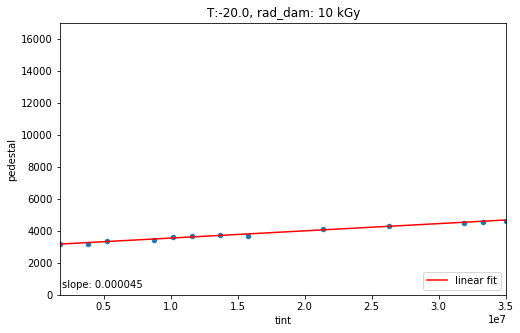

-20.0 12
cut>2


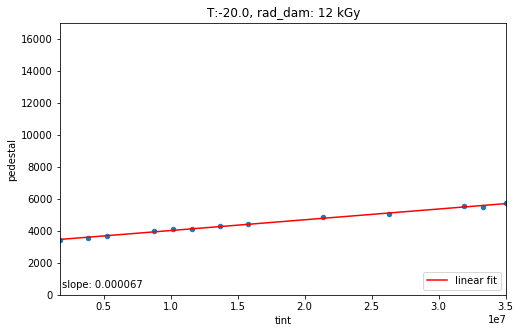

-20.0 14
cut>2


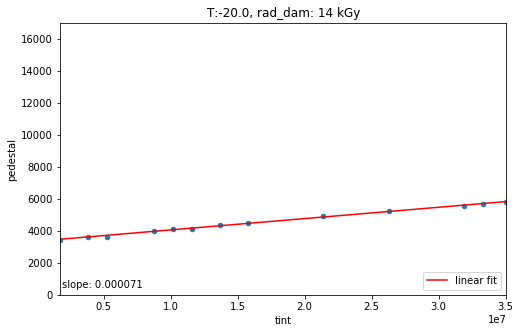

-20.0 16
cut>2


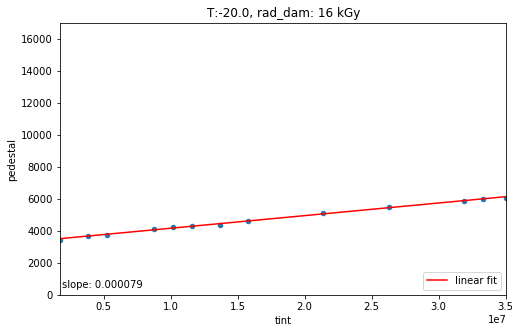

-20.0 18
cut>2


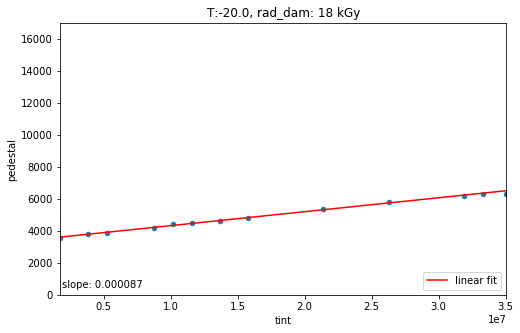

-20.0 20
cut>2


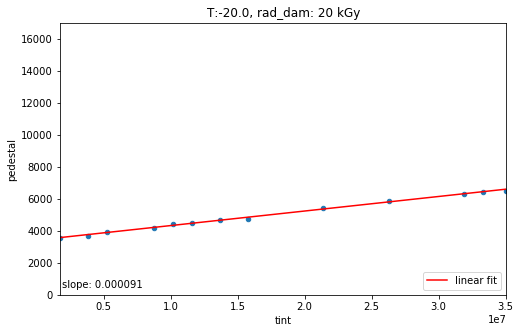

-20.0 25
cut>2


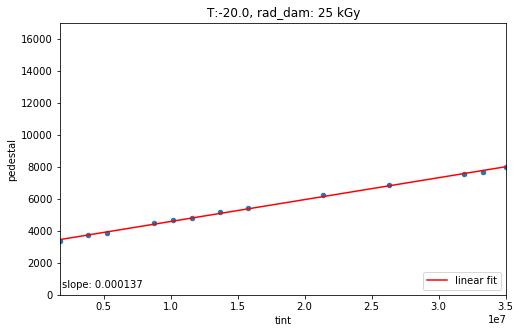

-20.0 30
cut>2


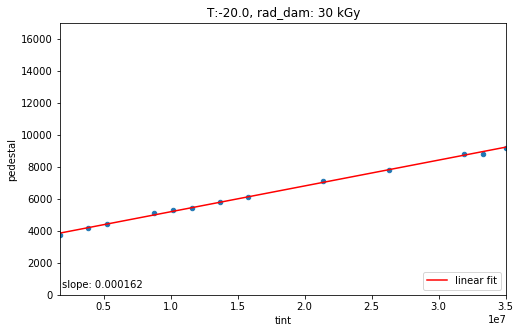

-20.0 35
cut>2


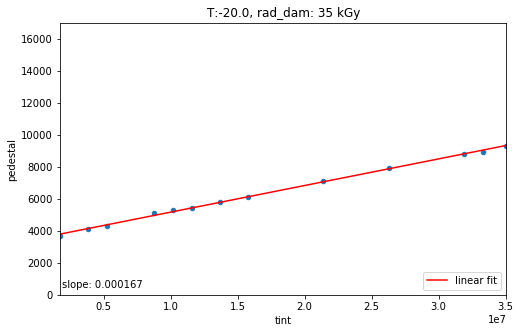

-20.0 40
cut>2


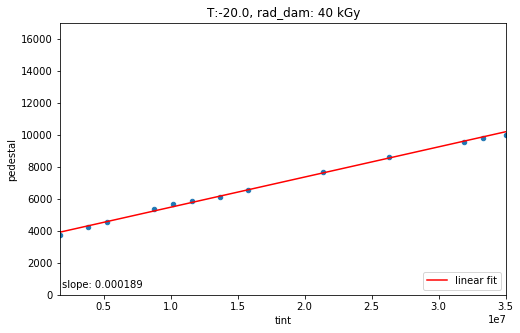

-20.0 45
cut>2


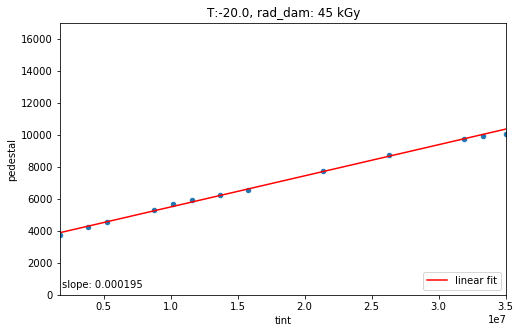

-20.0 50
cut>2


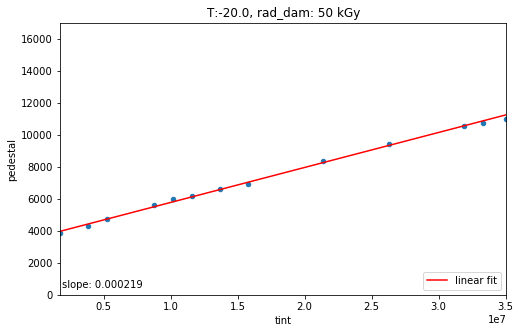

-15.0 1
cut>2


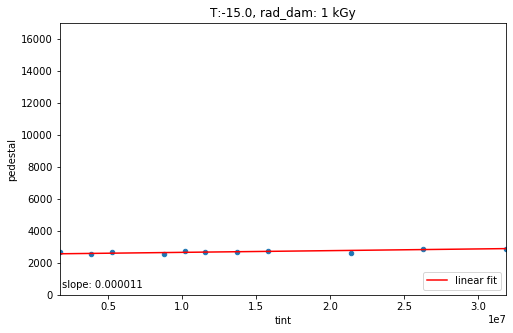

-15.0 2
cut>2


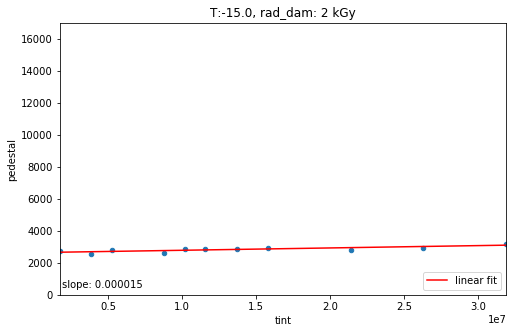

-15.0 3
cut>2


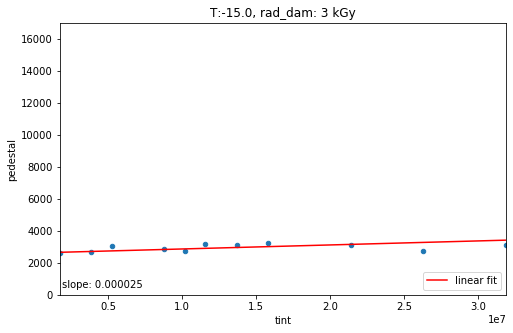

-15.0 4
cut>2


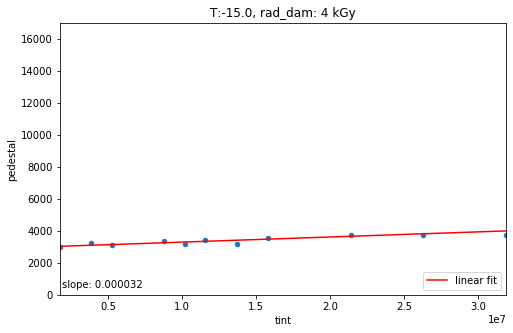

-15.0 5
cut>2


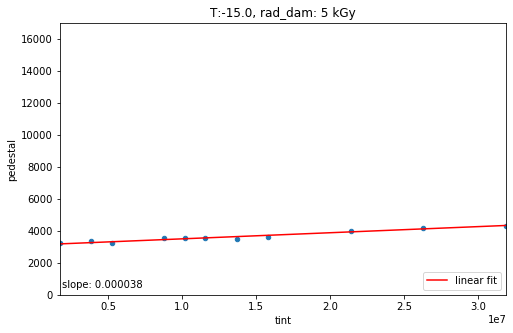

-15.0 6
cut>2


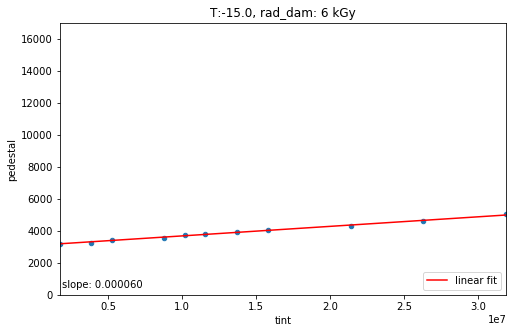

-15.0 8
cut>2


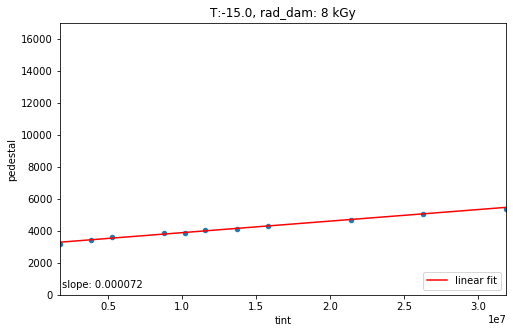

-15.0 9
cut>2


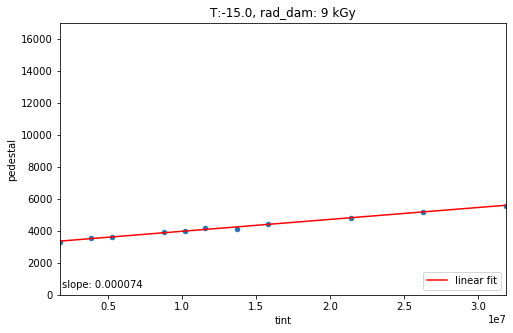

-15.0 10
cut>2


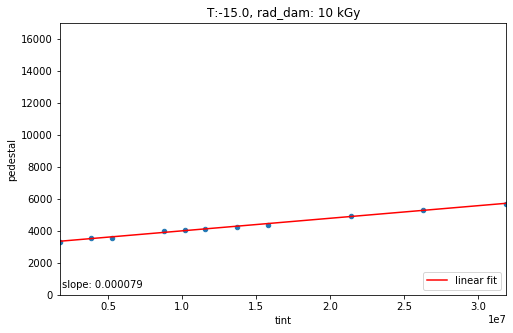

-15.0 12
cut>2


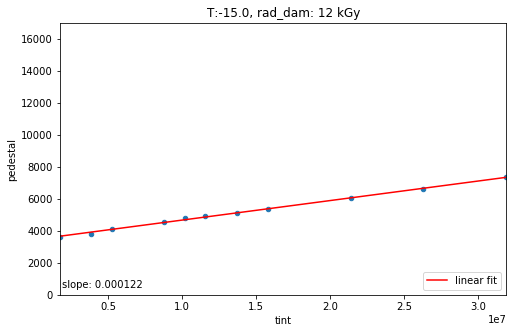

-15.0 14
cut>2


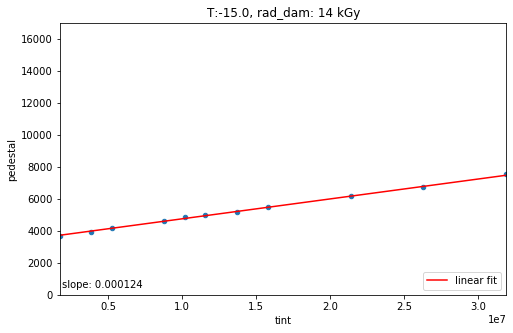

-15.0 16
cut>2


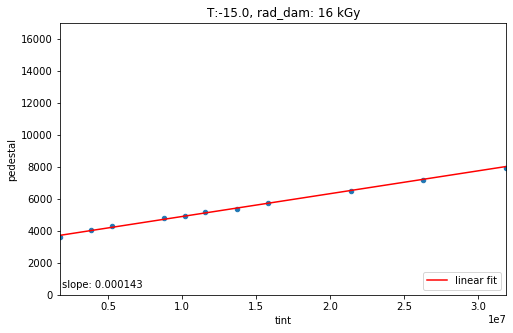

-15.0 18
cut>2


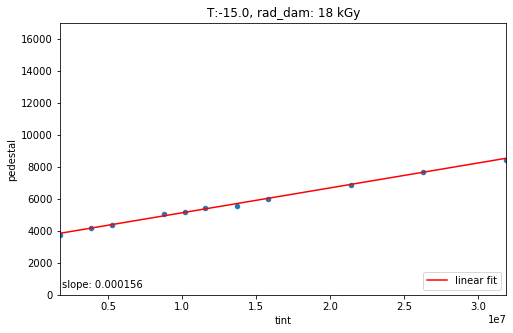

-15.0 20
cut>2


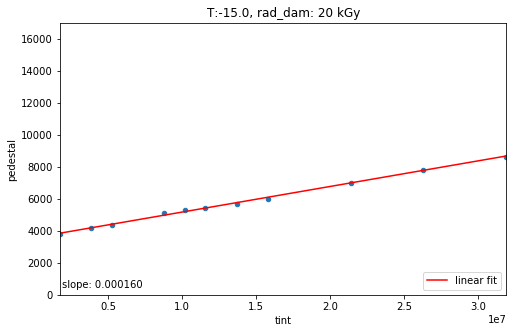

-15.0 25
cut>2


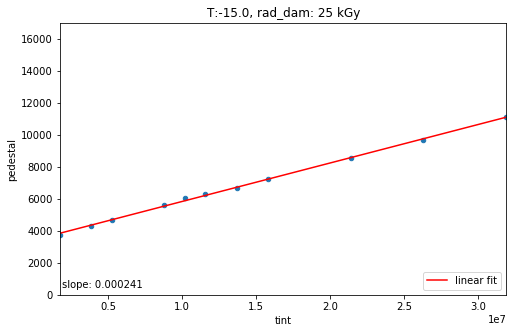

-15.0 30
cut>2


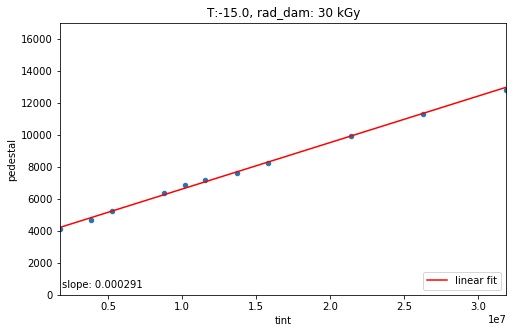

-15.0 35
cut>2


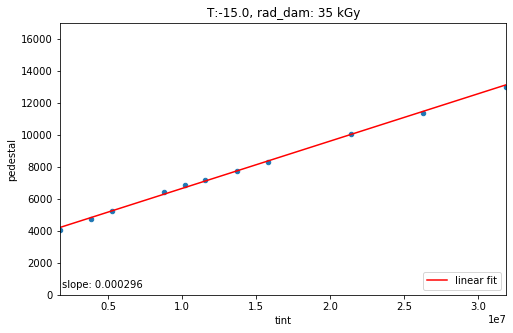

-15.0 40
cut>2


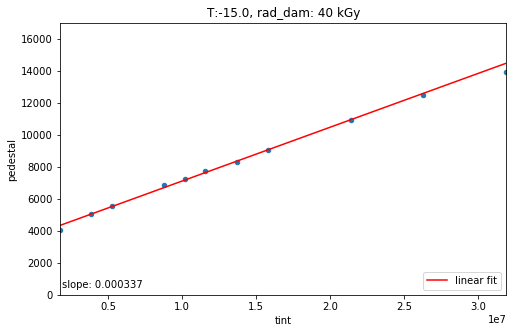

-15.0 45
cut>2


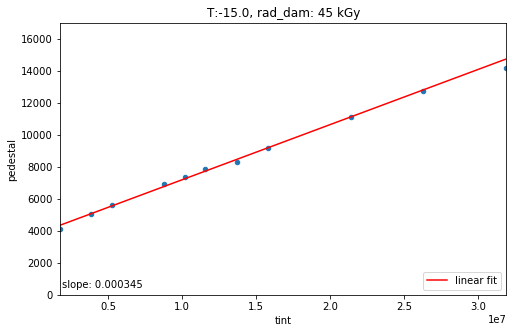

-15.0 50
cut>2


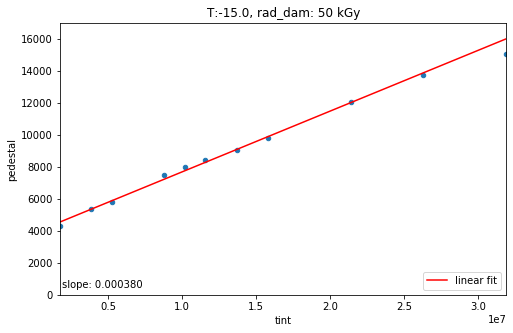

-10.0 1
cut>2


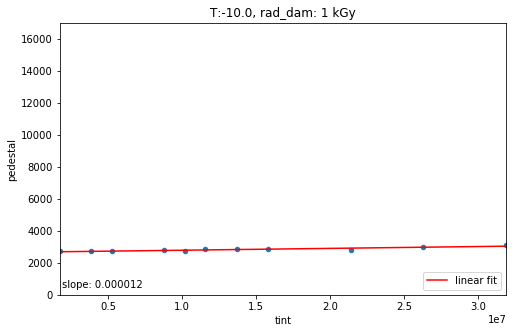

-10.0 2
cut>2


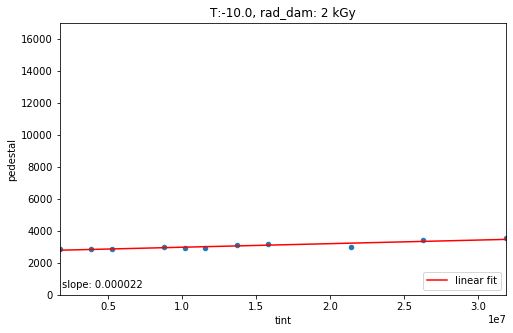

-10.0 3
cut>2


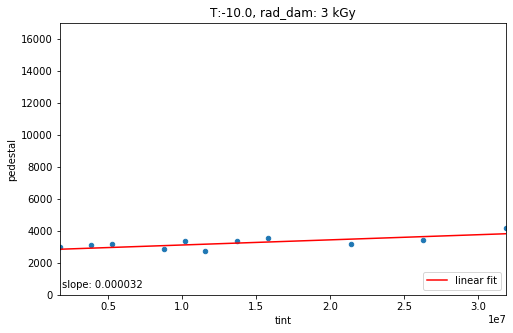

-10.0 4
cut>2


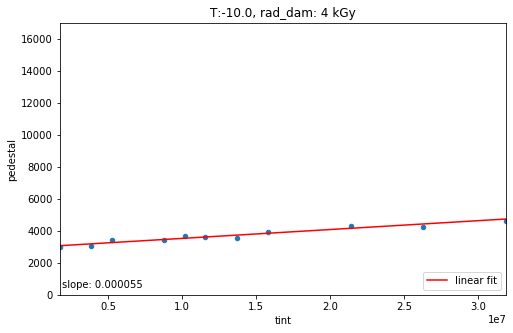

-10.0 5
cut>2


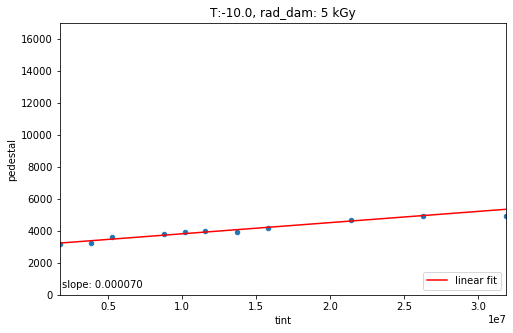

-10.0 6
cut>2


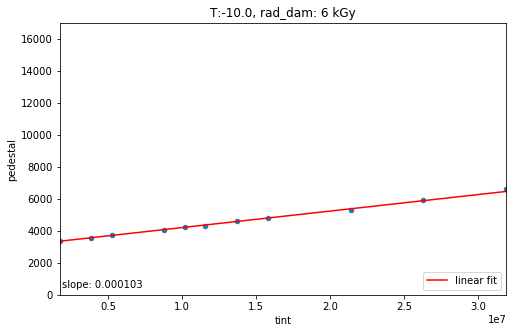

-10.0 8
cut>2


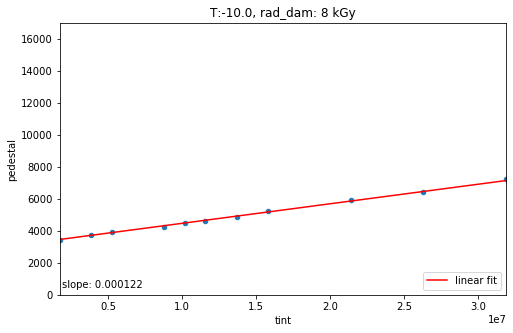

-10.0 9
cut>2


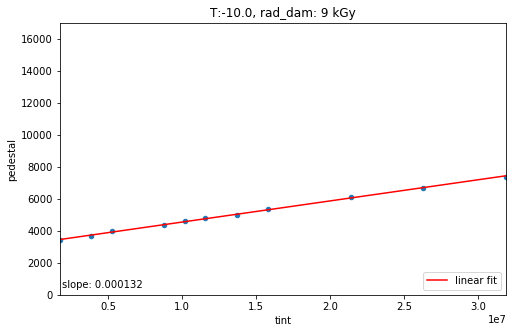

-10.0 10
cut>2


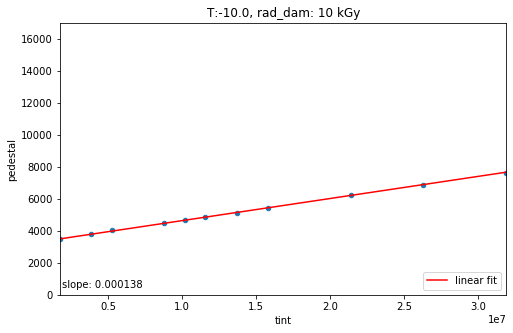

-10.0 12
cut>2


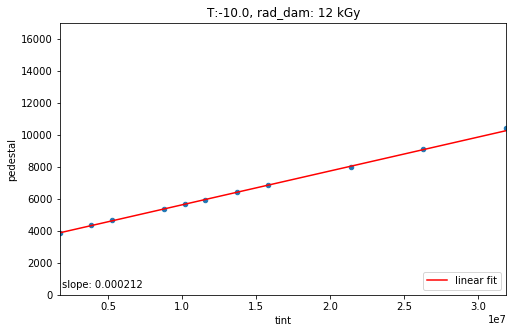

-10.0 14
cut>2


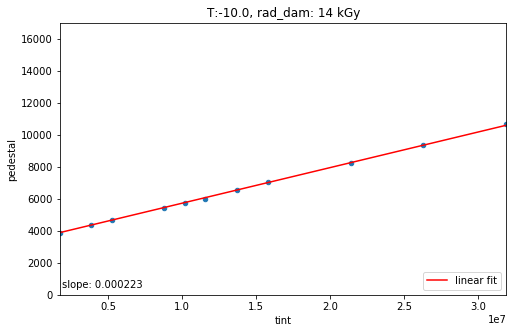

-10.0 16
cut>2


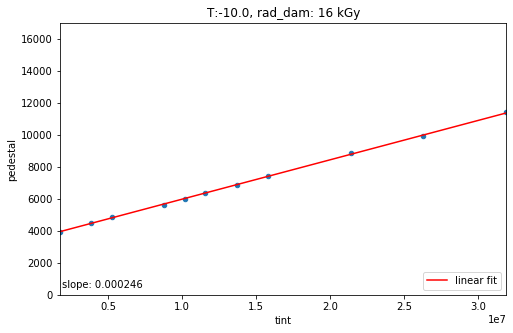

-10.0 18
cut>2


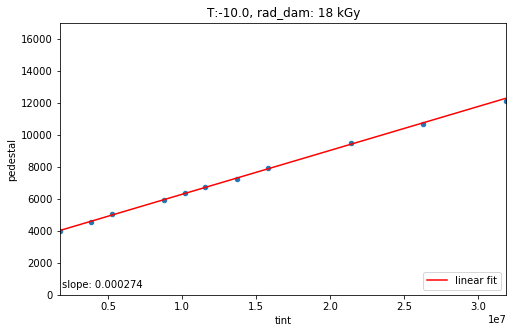

-10.0 20
cut>2


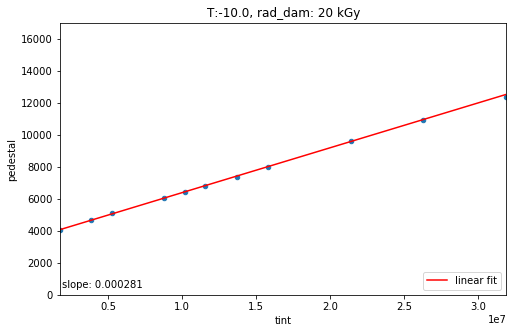

-10.0 25
cut>2


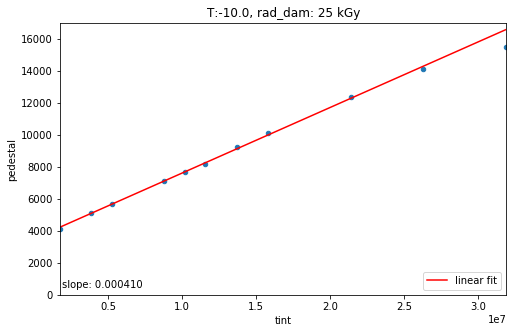

-10.0 30
cut>2


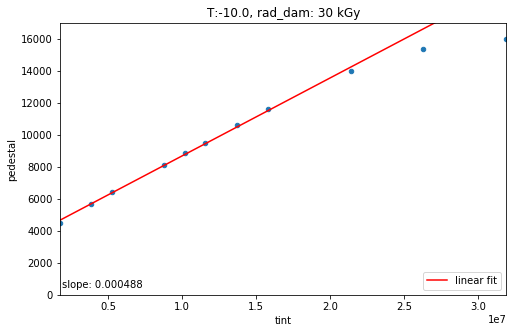

-10.0 35
cut>2


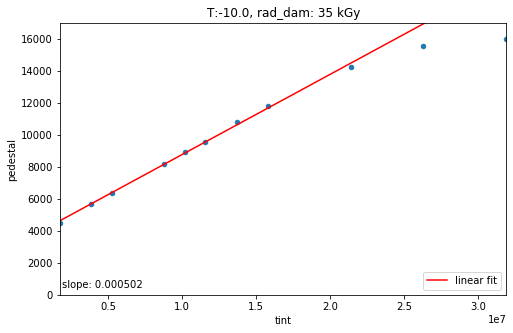

-10.0 40
cut>2


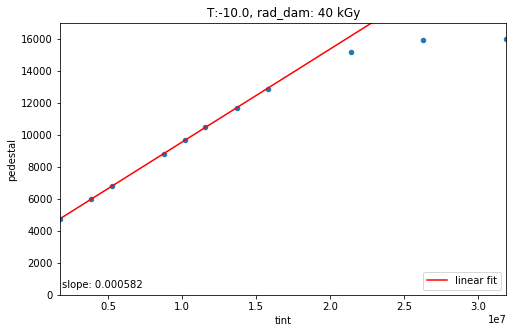

-10.0 45
cut>2


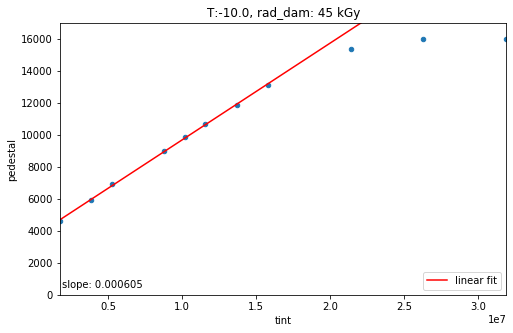

-10.0 50
cut>2


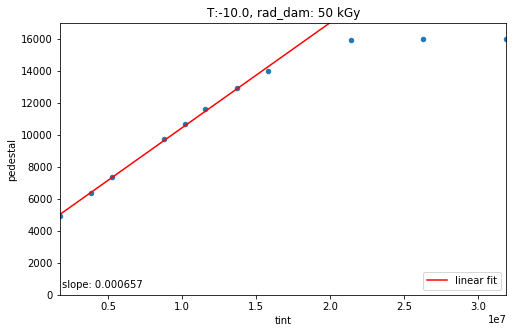

-5.0 1
cut>2


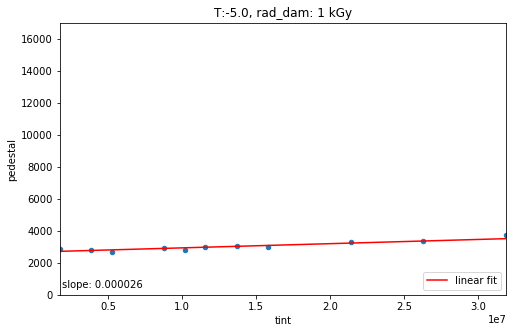

-5.0 2
cut>2


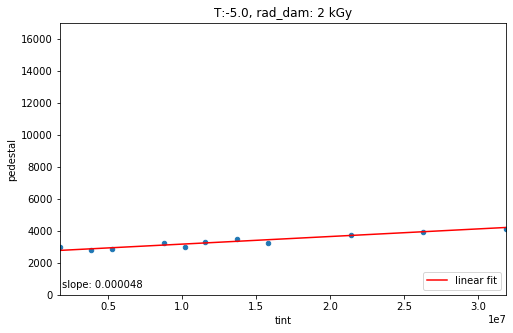

-5.0 3
cut>2


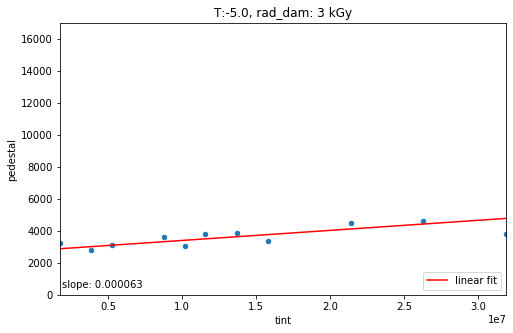

-5.0 4
cut>2


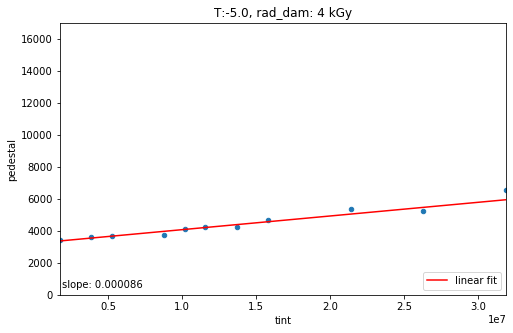

-5.0 5
cut>2


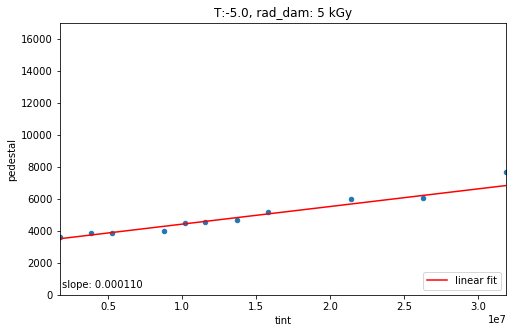

-5.0 6
cut>2


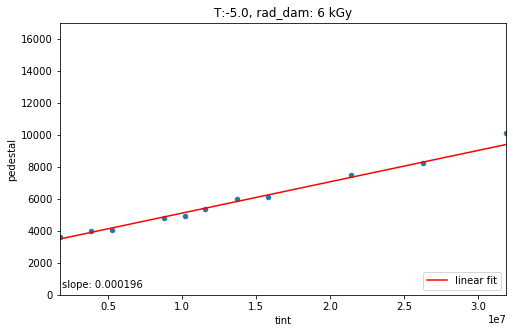

-5.0 8
cut>2


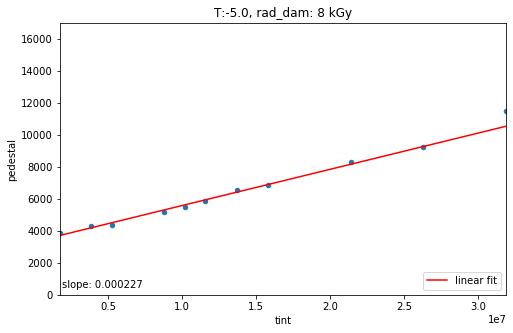

-5.0 9
cut>2


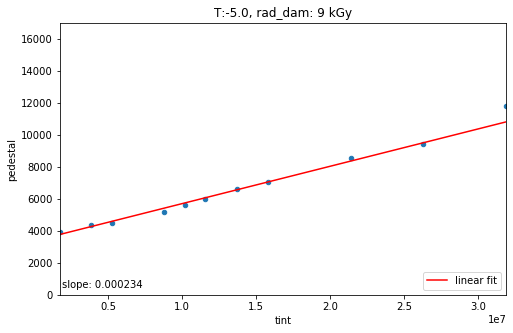

-5.0 10
cut>2


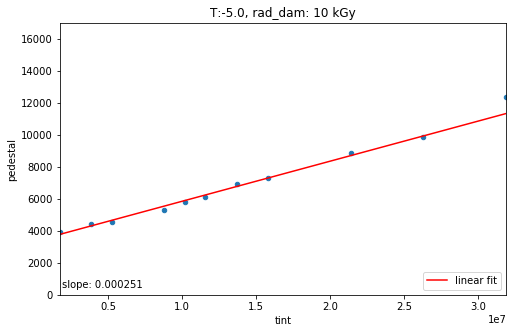

-5.0 12
cut>2


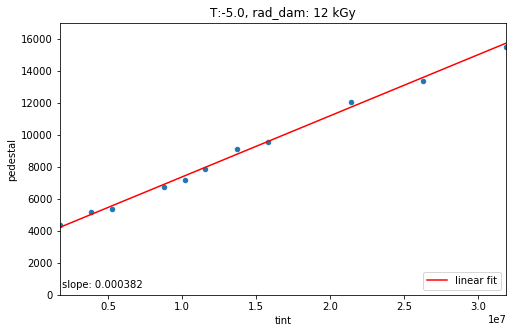

-5.0 14
cut>2


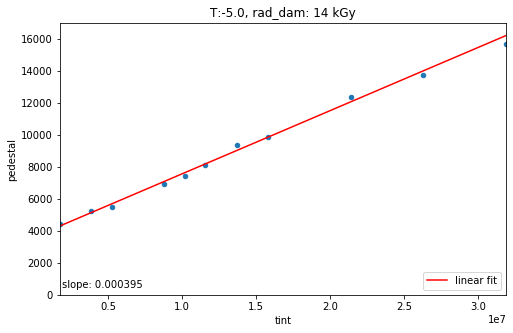

-5.0 16
cut>2


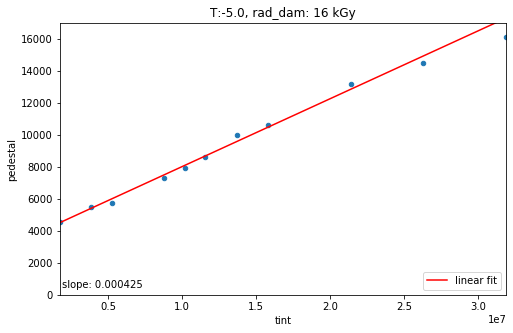

-5.0 18
cut>2


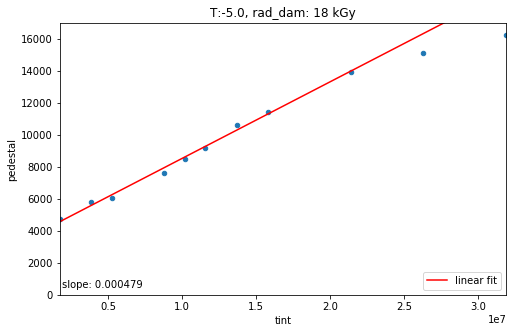

-5.0 20
cut>2


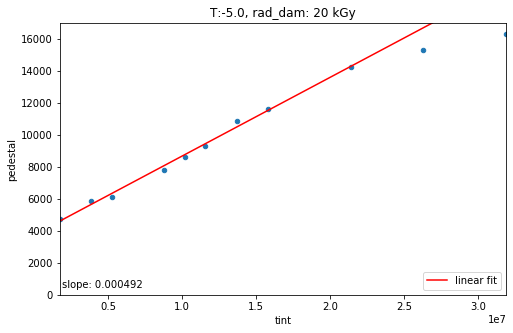

-5.0 25
cut>2


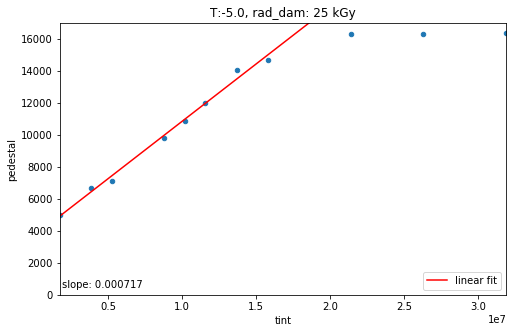

-5.0 30
cut>2


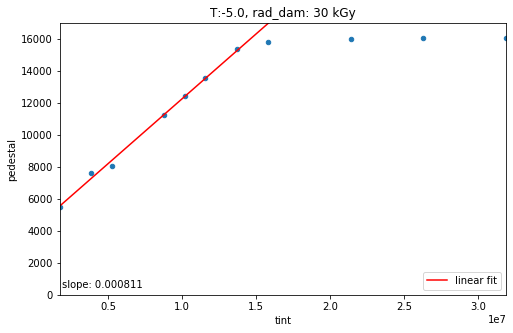

-5.0 35
cut>2


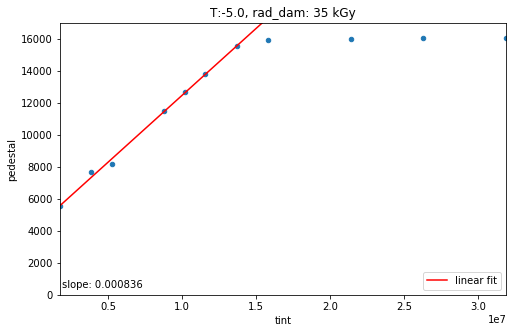

-5.0 40
cut>2


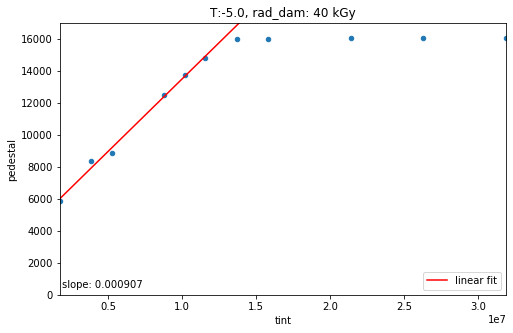

-5.0 45
cut>2


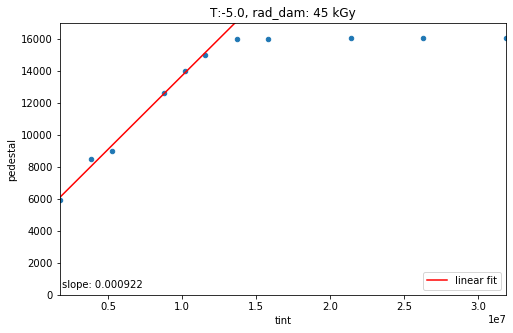

-5.0 50
cut>2


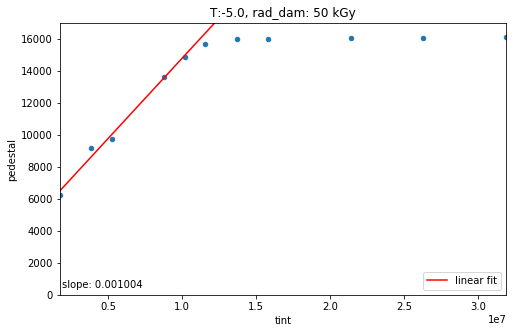

0.1 1
cut>2


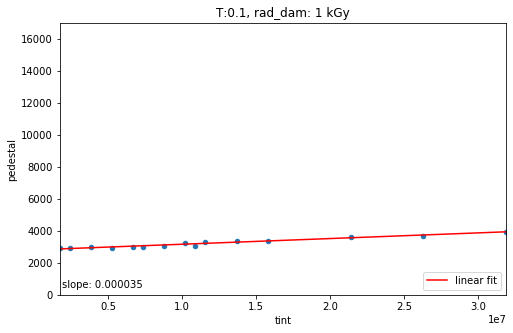

0.1 2
cut>2


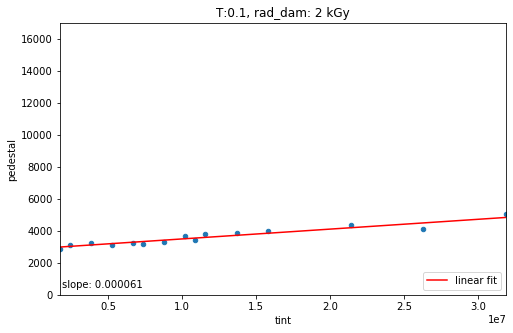

0.1 3
cut>2


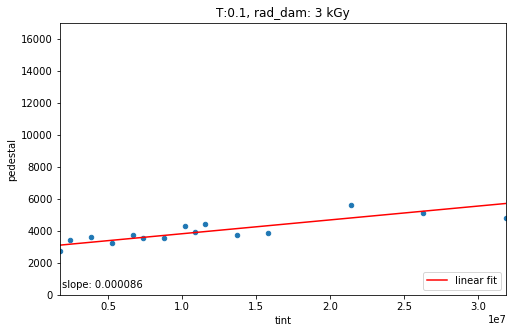

0.1 4
cut>2


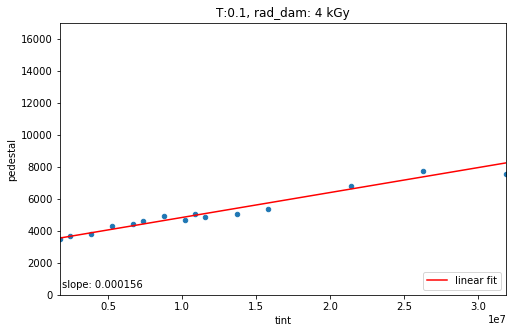

0.1 5
cut>2


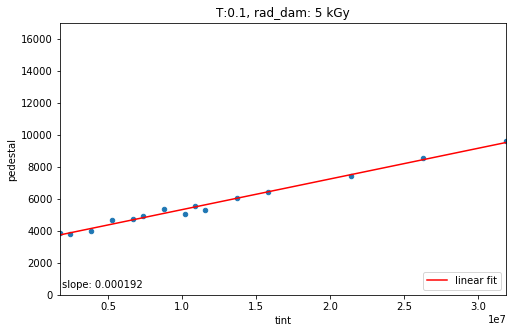

0.1 6
cut>2


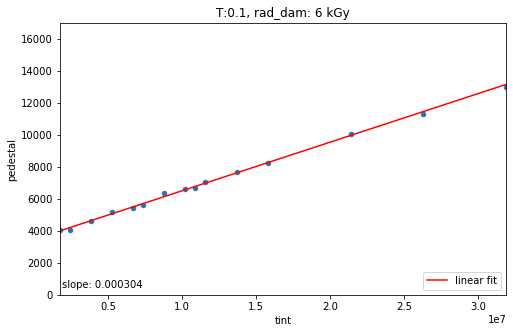

0.1 8
cut>2


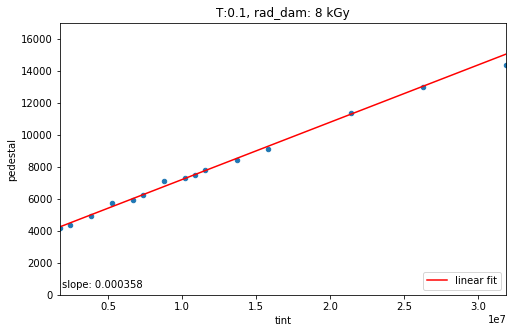

0.1 9
cut>2


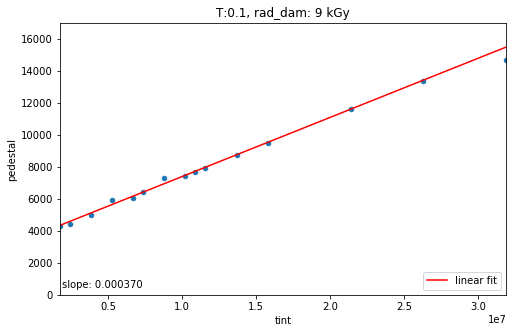

0.1 10
cut>2


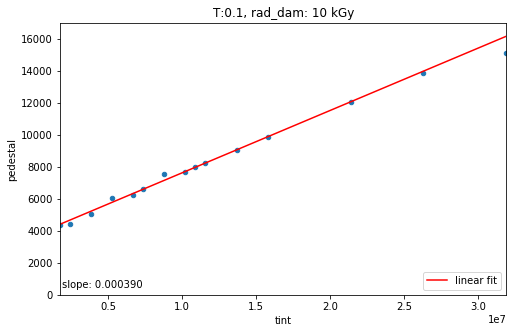

0.1 12
cut>2


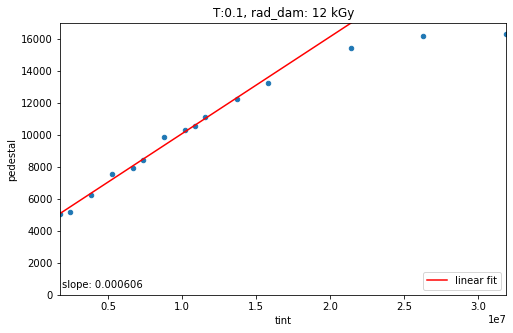

0.1 14
cut>2


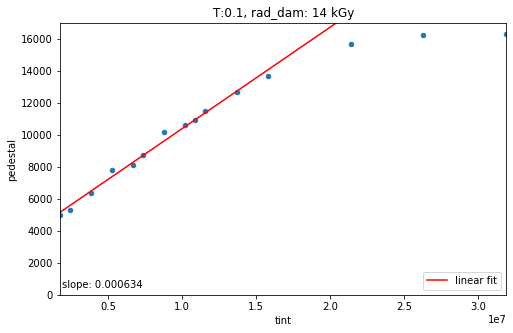

0.1 16
cut>2


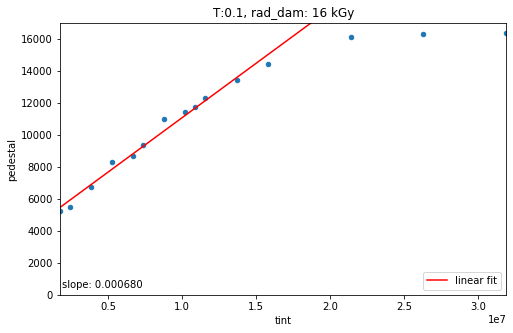

0.1 18
cut>2


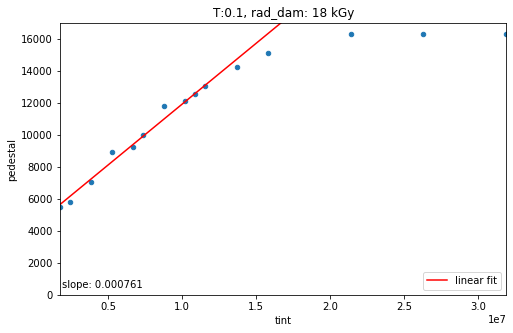

0.1 20
cut>2


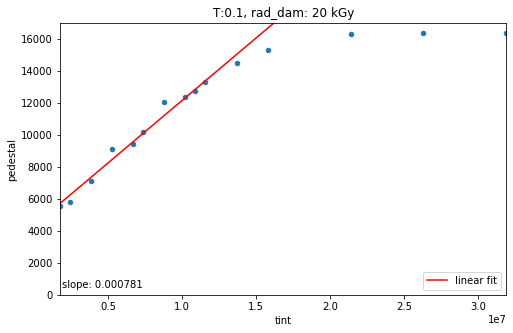

0.1 25
cut>2


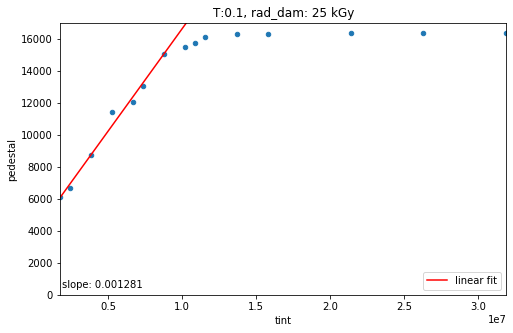

0.1 30
cut>2


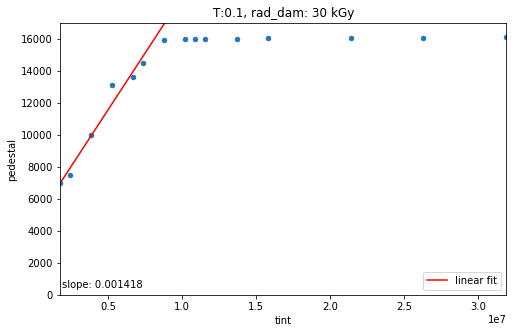

0.1 35
cut>2


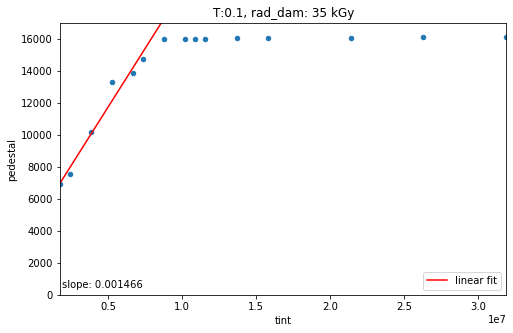

0.1 40
cut>2


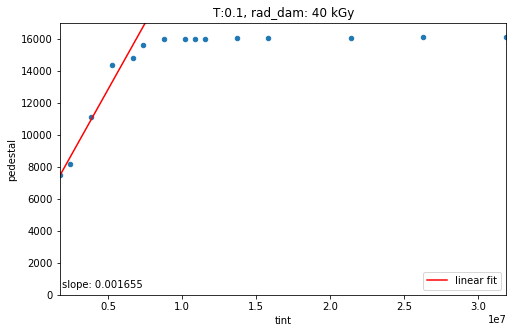

0.1 45
cut>2


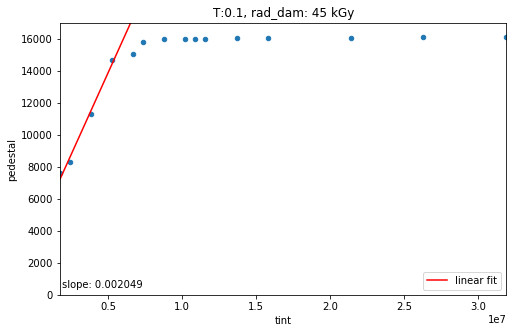

0.1 50
cut>2


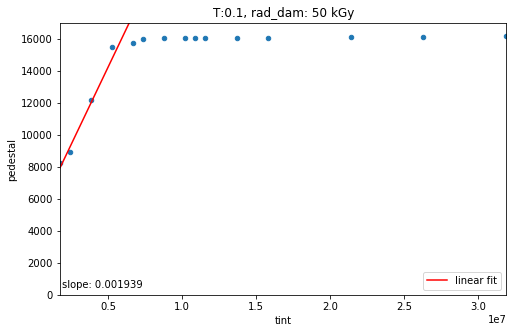

4.9 1
cut>2


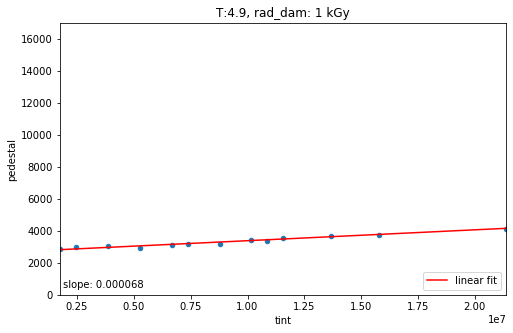

4.9 2
cut>2


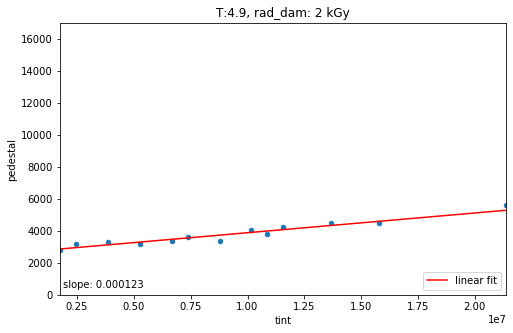

4.9 3
cut>2


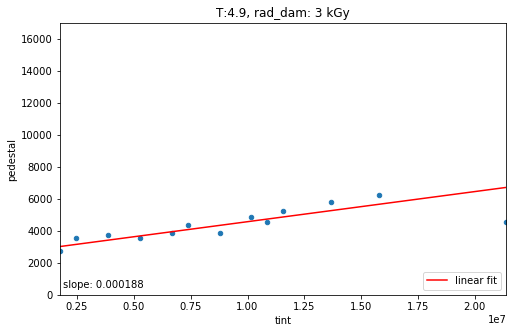

4.9 4
cut>2


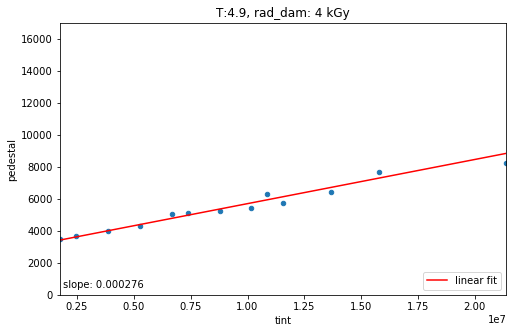

4.9 5
cut>2


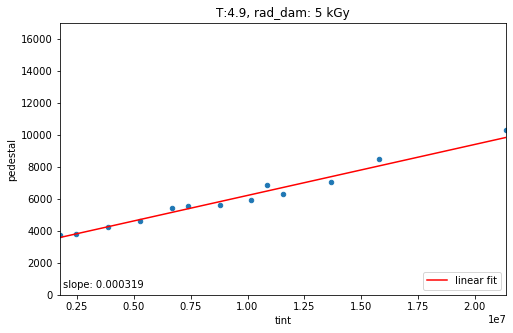

4.9 6
cut>2


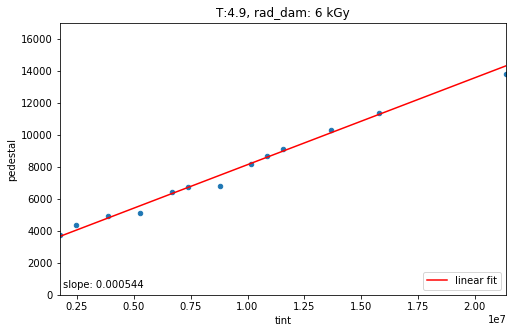

4.9 8
cut>2


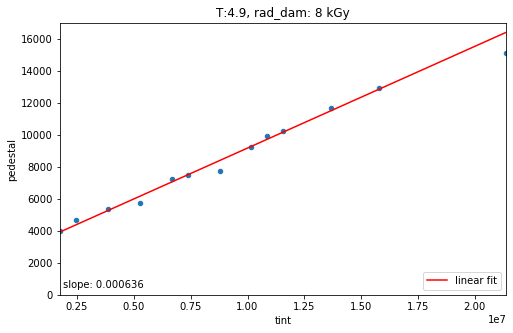

4.9 9
cut>2


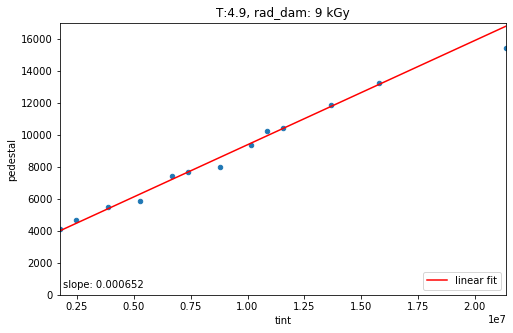

4.9 10
cut>2


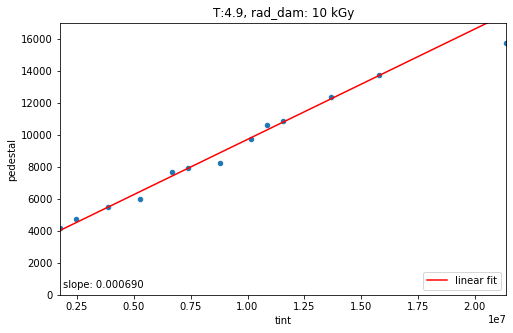

4.9 12
cut>2


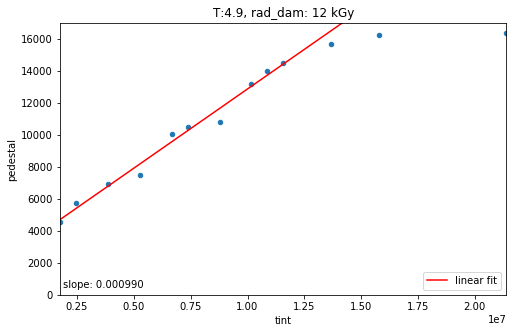

4.9 14
cut>2


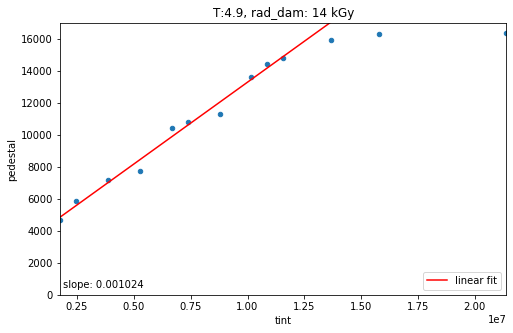

4.9 16
cut>2


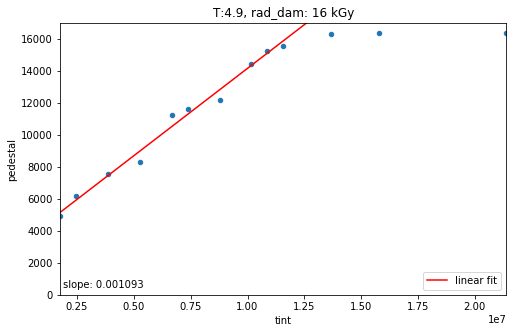

4.9 18
cut>2


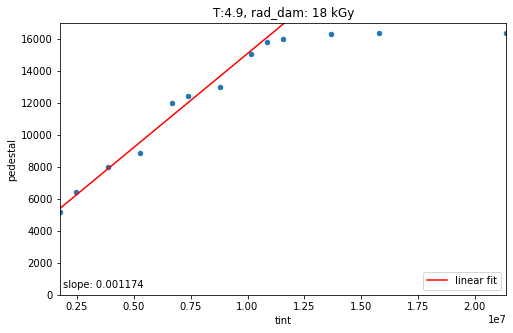

4.9 20
cut>2


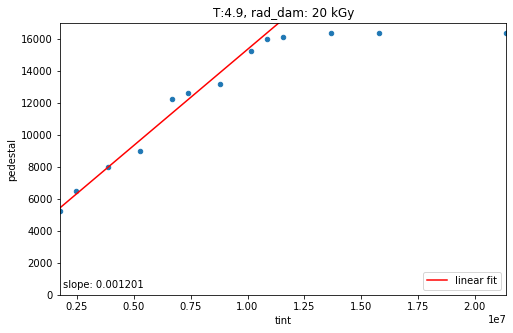

4.9 25
cut>2


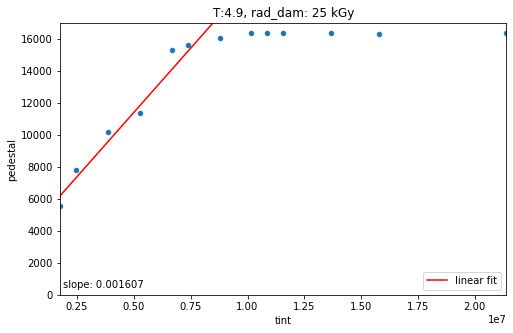

4.9 30
cut>2


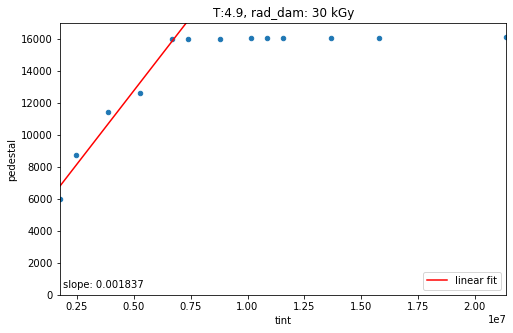

4.9 35
cut>2


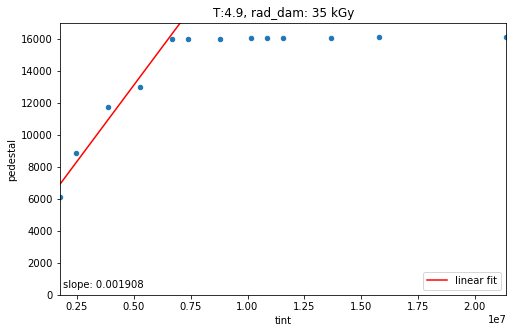

4.9 40
cut>2


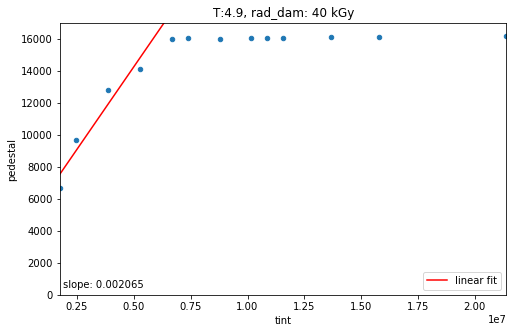

4.9 45
cut>2


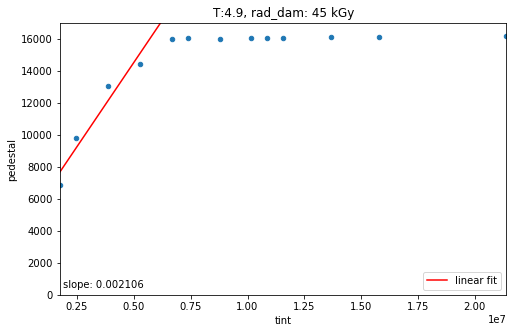

4.9 50
cut>2


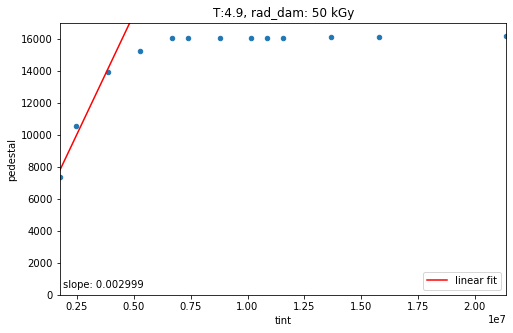

10.0 1
cut>2


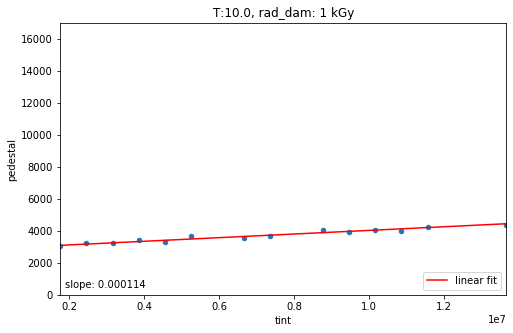

10.0 2
cut>2


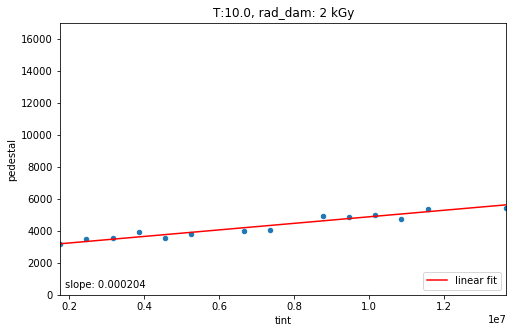

10.0 3
cut>2


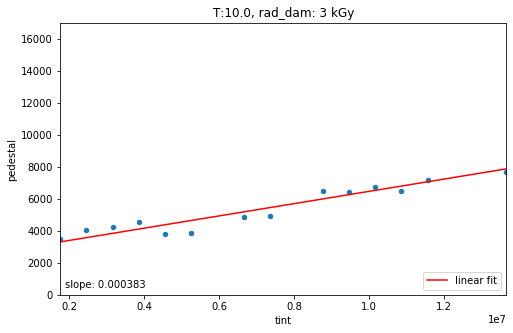

10.0 4
cut>2


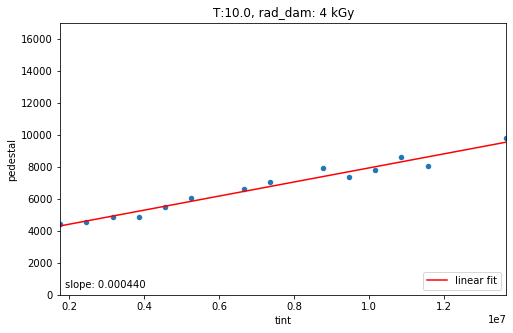

10.0 5
cut>2


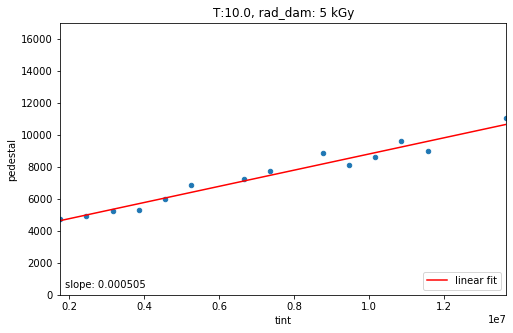

10.0 6
cut>2


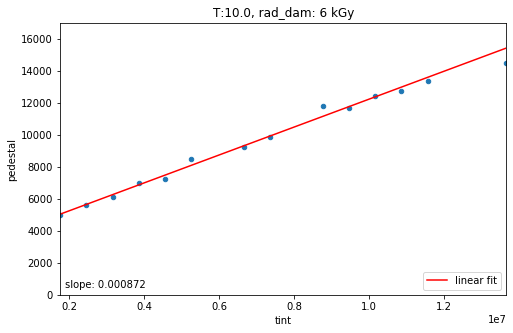

10.0 8
cut>2


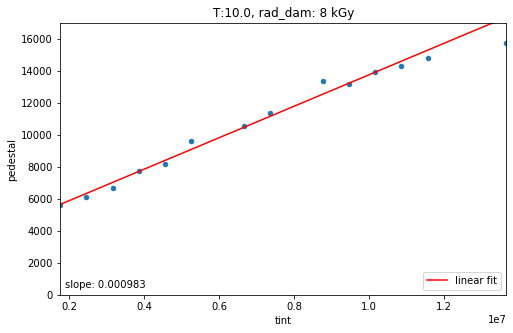

10.0 9
cut>2


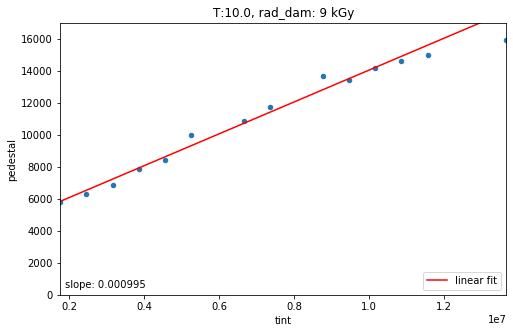

10.0 10
cut>2


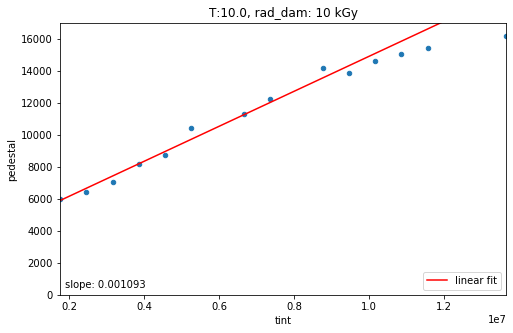

10.0 12
cut>2


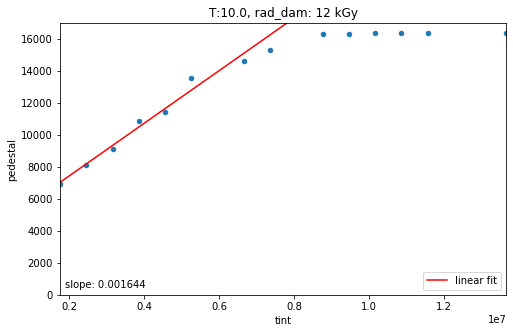

10.0 14
cut>2


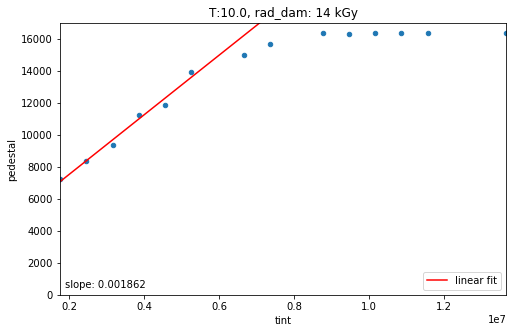

10.0 16
cut>2


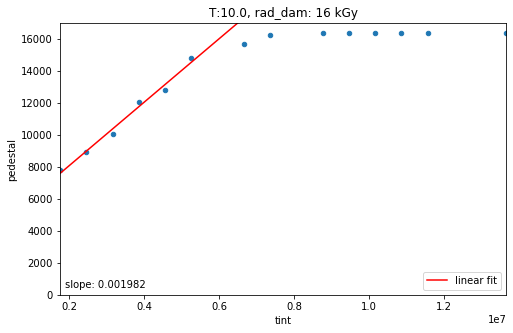

10.0 18
cut>2


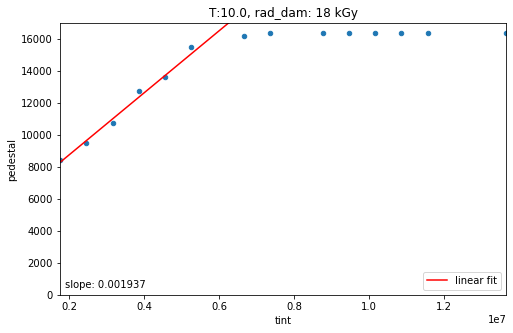

10.0 20
cut>2


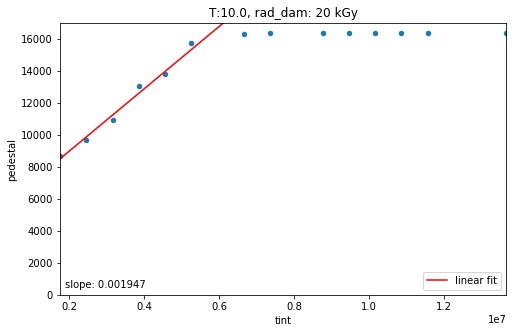

10.0 25
cut>2


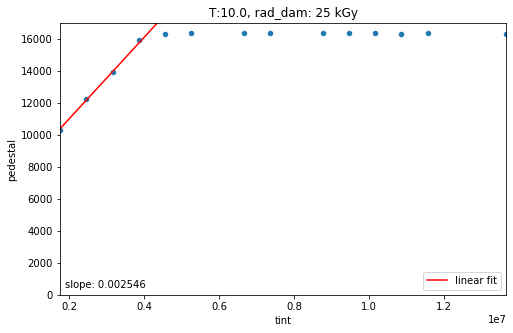

10.0 30
cut=2


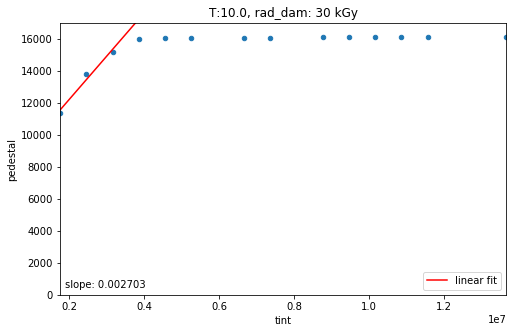

10.0 35
cut=2


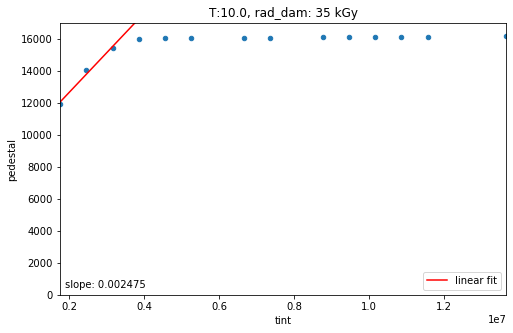

10.0 40
cut=1
[13267.73735   15013.301875  15993.521325  16037.5584375 16043.3241
 16065.1745125 16078.4693875 16086.11695   16120.0451375 16123.7273375
 16134.44495   16142.7704    16154.4124125 16183.099175 ]


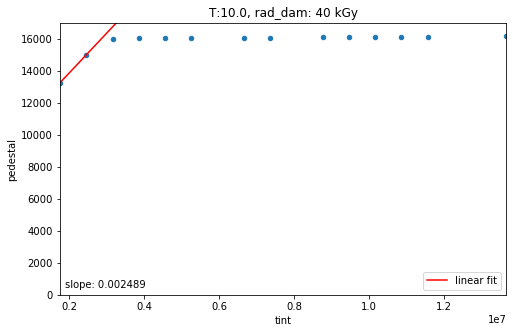

10.0 45
cut=1
[13748.933675  15265.2632375 16016.1209625 16038.8290125 16045.0584375
 16067.1345375 16081.2970875 16091.0873625 16123.743325  16128.317275
 16138.5099125 16147.4101125 16158.6985375 16188.309725 ]


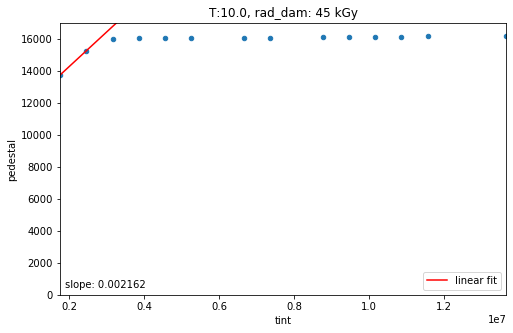

10.0 50
cut=1
[14799.4793125 15925.241875  16028.682875  16047.2877    16054.2789625
 16074.5778875 16094.78915   16109.5076    16142.8339875 16147.8022125
 16159.3817    16169.141625  16182.186925  16215.3584   ]


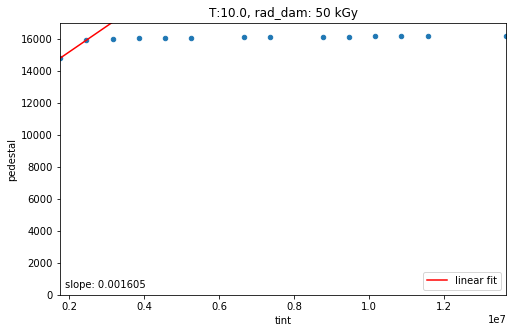

14.9 1
cut>2


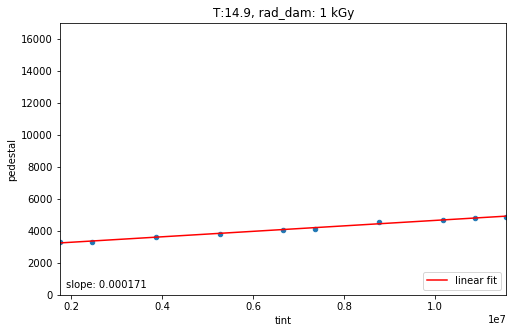

14.9 2
cut>2


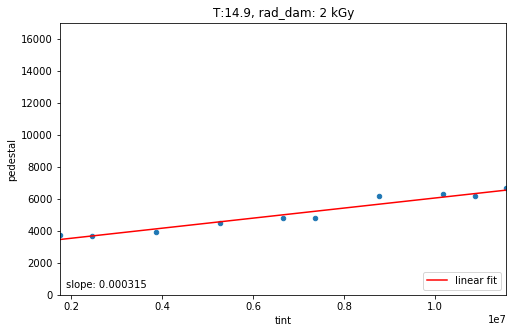

14.9 3
cut>2


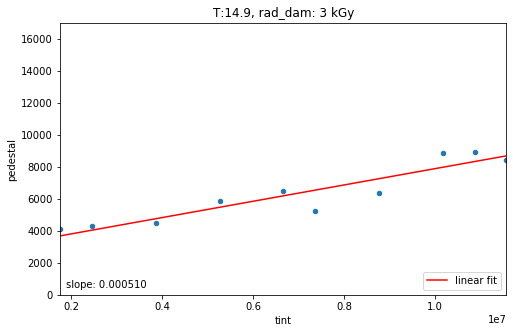

14.9 4
cut>2


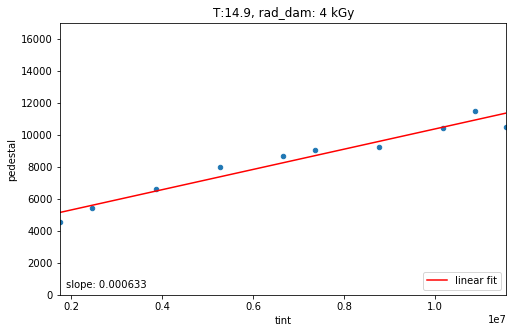

14.9 5
cut>2


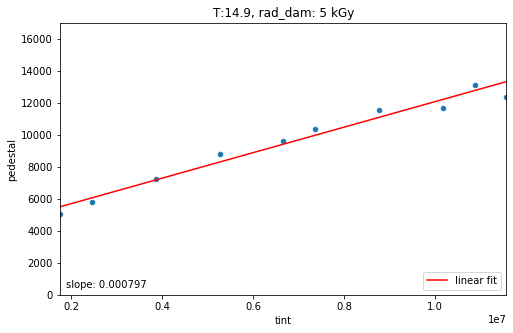

14.9 6
cut>2


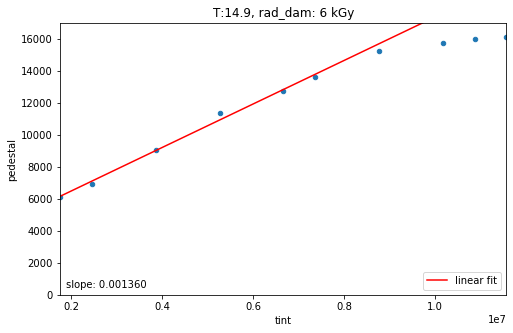

14.9 8
cut>2


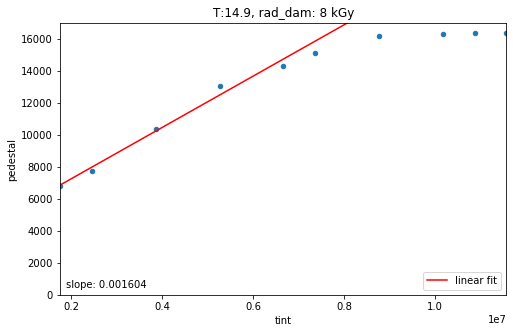

14.9 9
cut>2


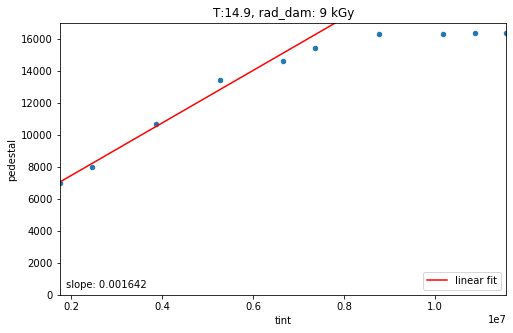

14.9 10
cut>2


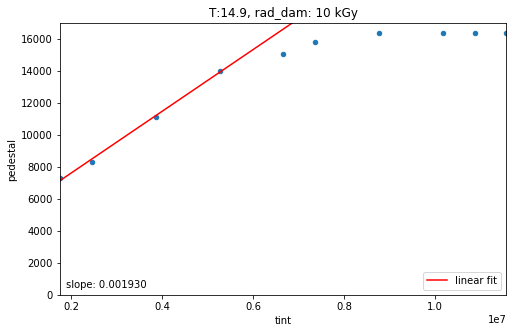

14.9 12
cut>2


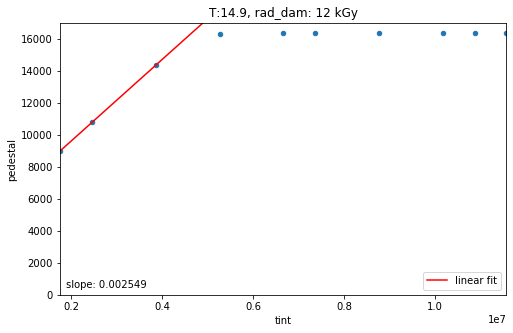

14.9 14
cut>2


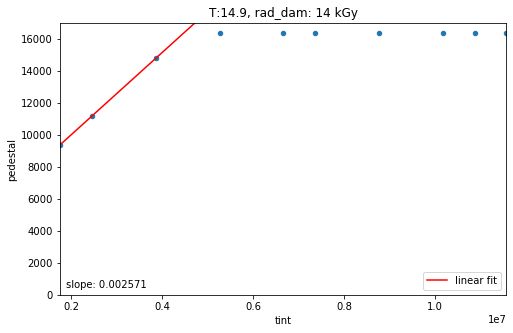

14.9 16
cut=2


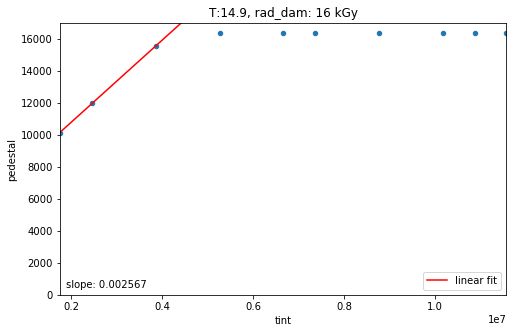

14.9 18
cut=2


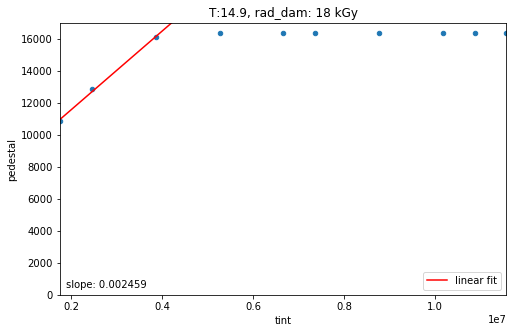

14.9 20
cut=2


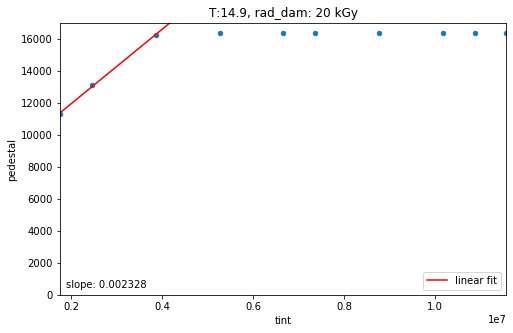

14.9 25
cut=1
[13952.8057    15876.873925  16324.6553875 16339.4163375 16342.40715
 16359.6166375 16360.2378625 16362.255375  16362.58635   16363.121175 ]


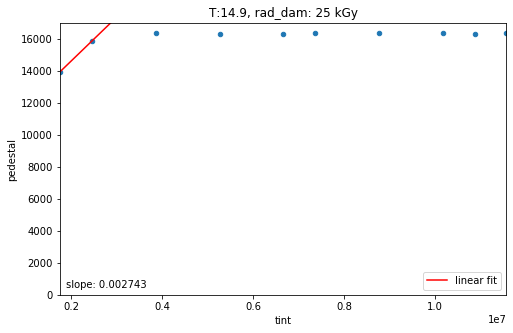

14.9 30
cut=1
[14956.2436375 16028.6723625 16063.2962375 16092.9991625 16121.03245
 16139.129875  16192.8270625 16251.734475  16294.98955   16348.2645375]


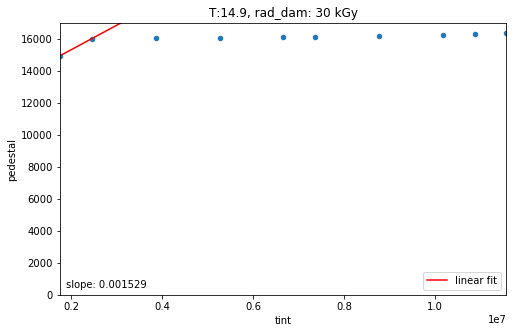

14.9 35
cut=0


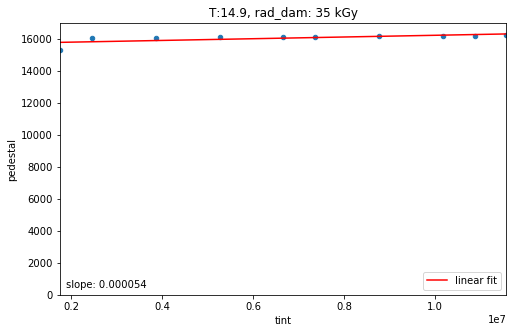

14.9 40
cut=0


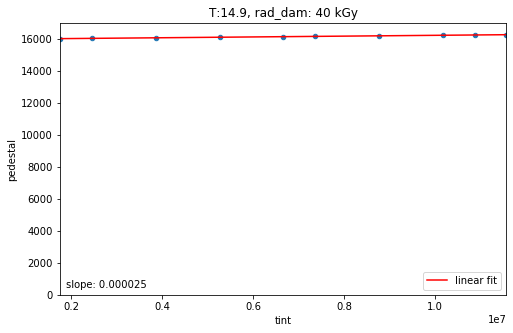

14.9 45
cut=0


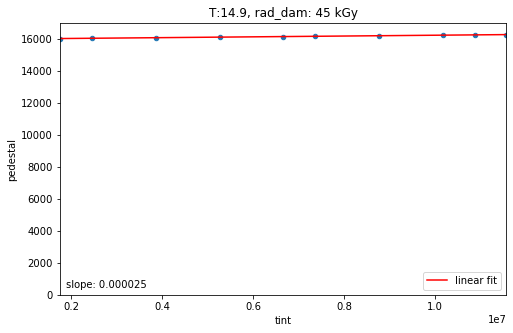

14.9 50
cut=0


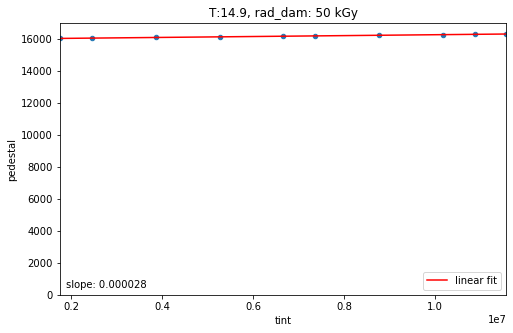

20.0 1
cut>2


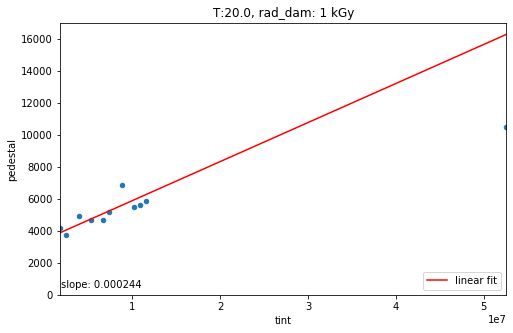

20.0 2
cut>2


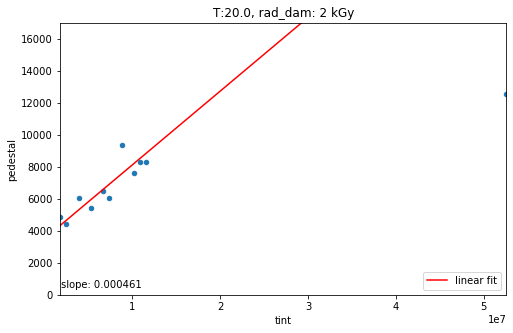

20.0 3
cut>2


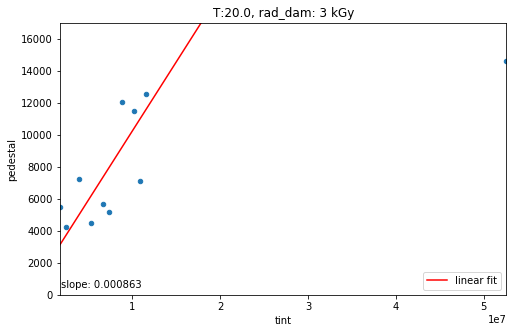

20.0 4
cut>2


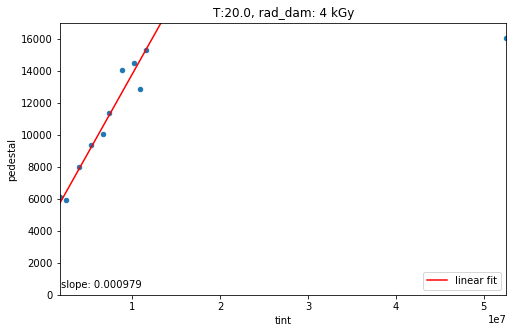

20.0 5
cut>2


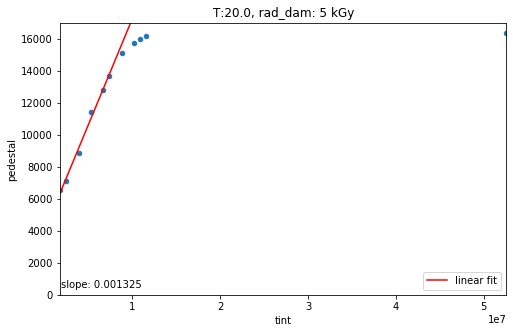

20.0 6
cut>2


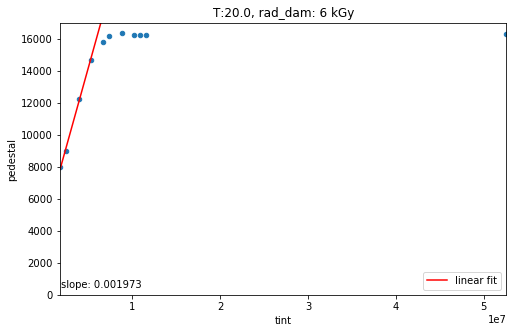

20.0 8
cut>2


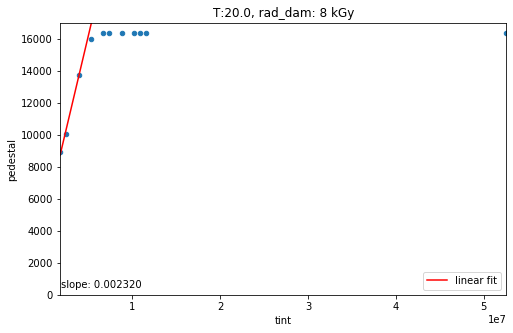

20.0 9
cut>2


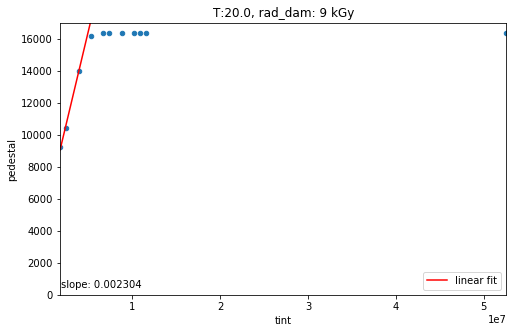

20.0 10
cut>2


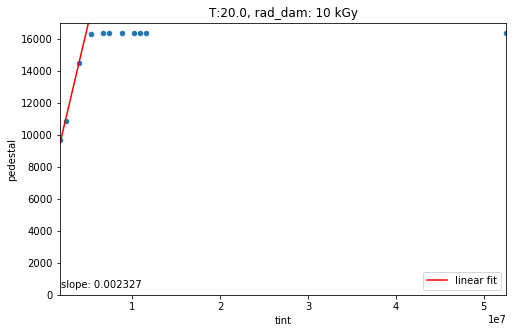

20.0 12
cut=2


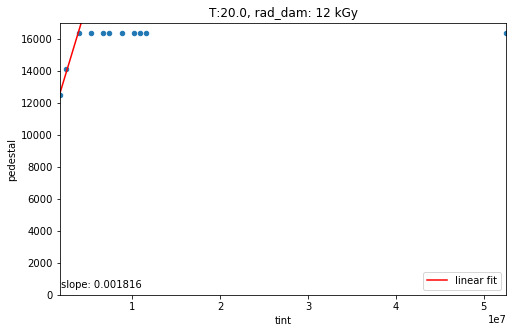

20.0 14
cut=2


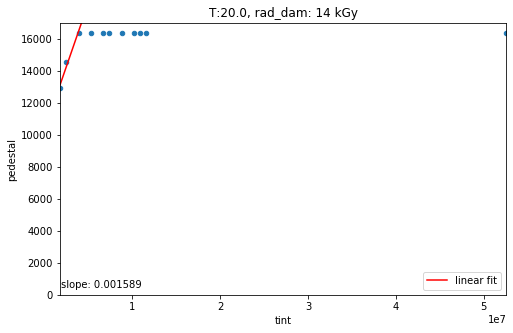

20.0 16
cut=1
[13840.3963875 15260.6129    16377.313525  16382.49175   16382.9167125
 16382.9757375 16382.9769125 16382.983425  16382.9837625 16382.9863625
 16382.9905375]


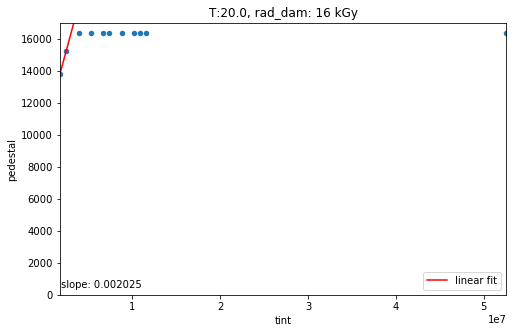

20.0 18
cut=1
[14626.0574375 15920.6308125 16372.605025  16376.0021625 16377.6781125
 16377.8307    16378.11585   16378.16915   16378.3185375 16378.3903375
 16378.5933875]


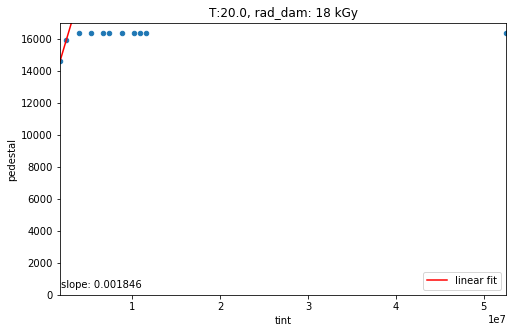

20.0 20
cut=1
[14931.196875  16117.5212125 16375.3431875 16380.898925  16382.230375
 16382.2389    16382.2395625 16382.2480875 16382.2894625 16382.297425
 16382.308525 ]


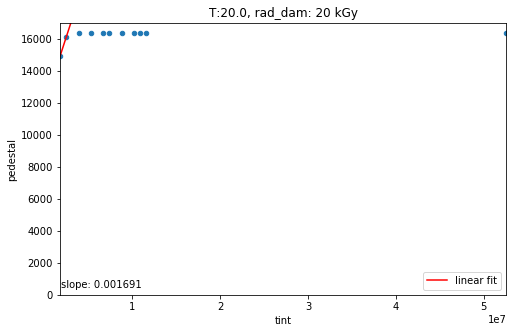

20.0 25
cut=0


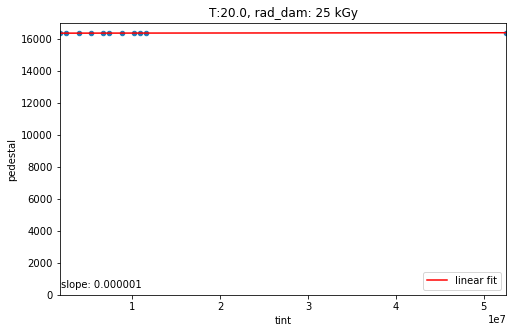

20.0 30
cut=0


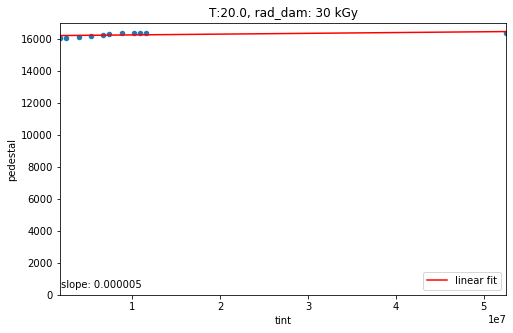

20.0 35
cut=0


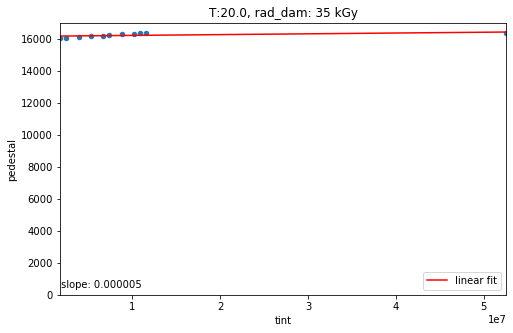

20.0 40
cut=0


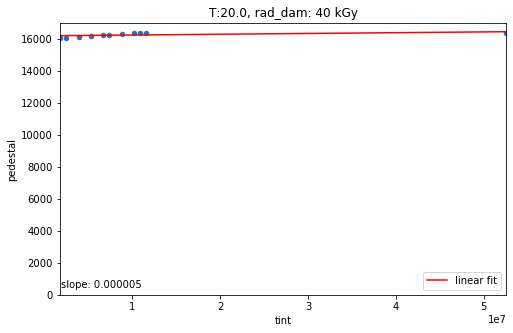

20.0 45
cut=0


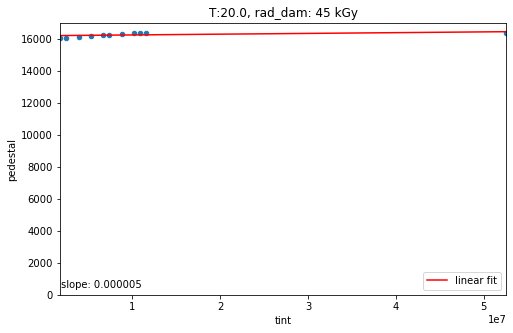

20.0 50
cut=0


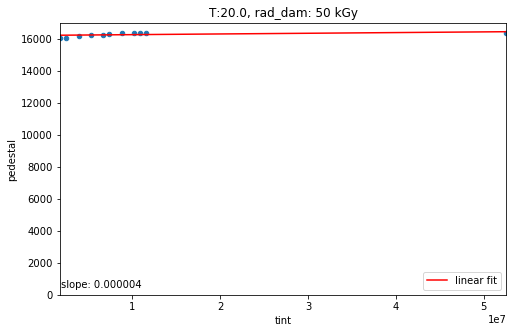

24.8 1
cut>2


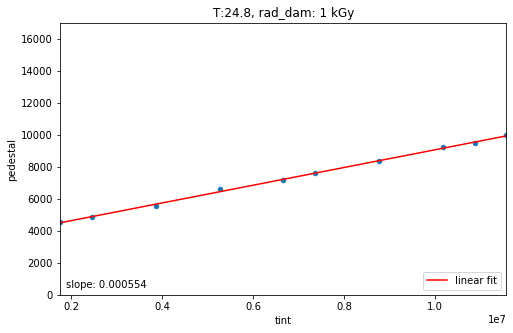

24.8 2
cut>2


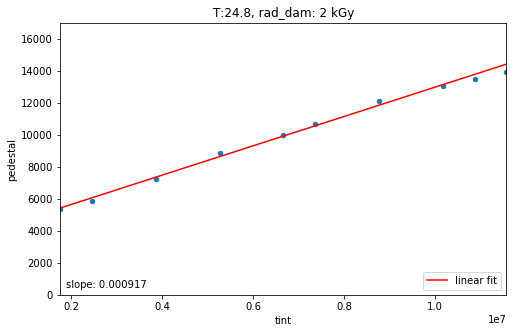

24.8 3
cut>2


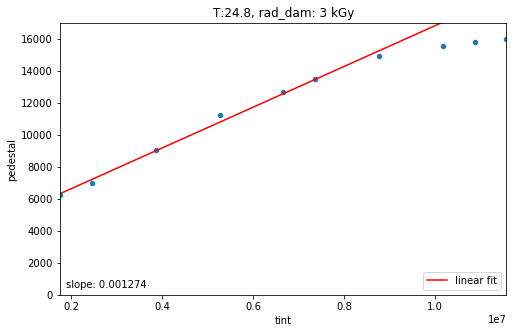

24.8 4
cut>2


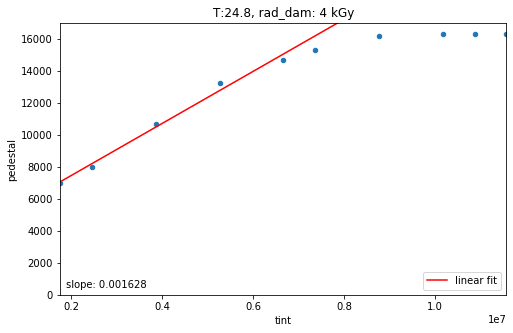

24.8 5
cut>2


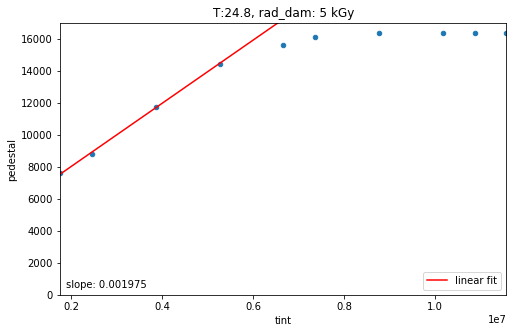

24.8 6
cut=2


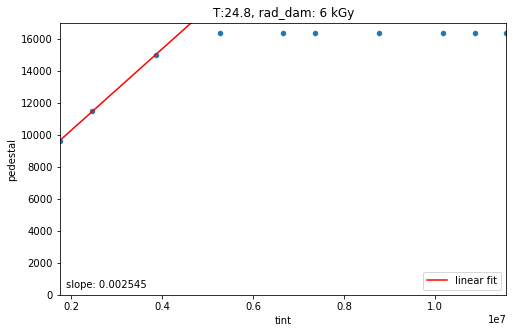

24.8 8
cut=2


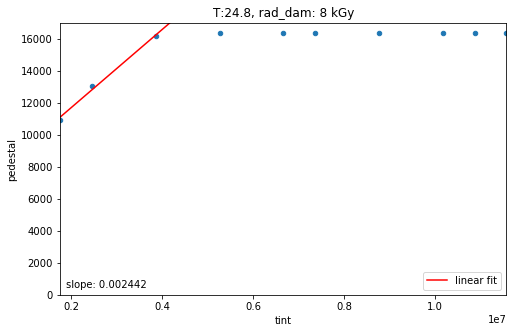

24.8 9
cut=2


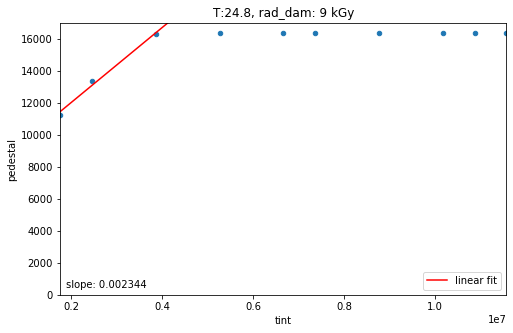

24.8 10
cut=2


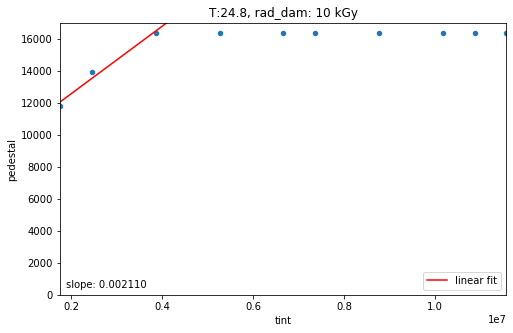

24.8 12
cut=1
[14892.576975  16321.7933875 16376.091725  16382.5237875 16382.806275
 16382.8091    16382.82115   16382.8298    16382.838025  16382.86715  ]


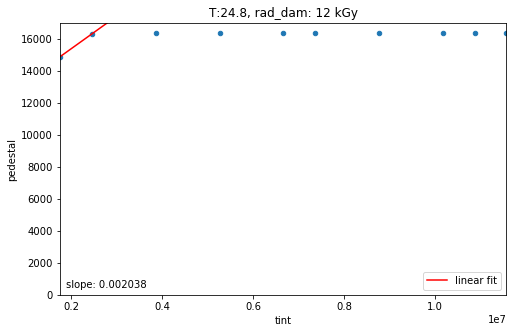

24.8 14
cut=0


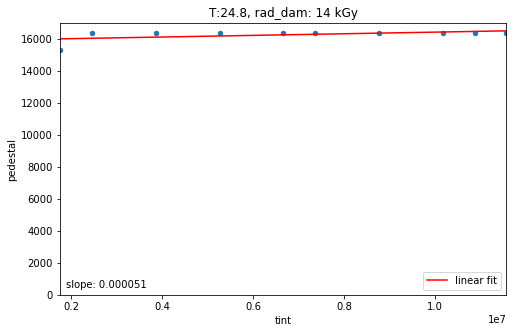

24.8 16
cut=0


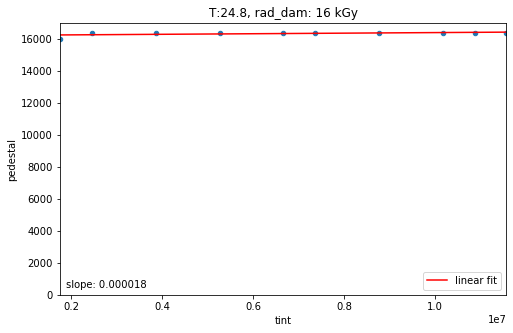

24.8 18
cut=0


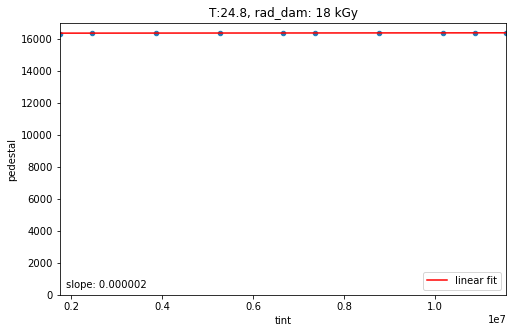

24.8 20
cut=0


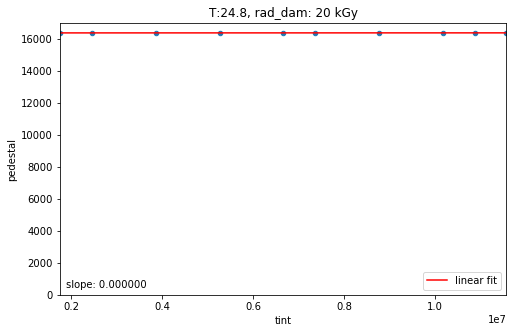

24.8 25
cut=0


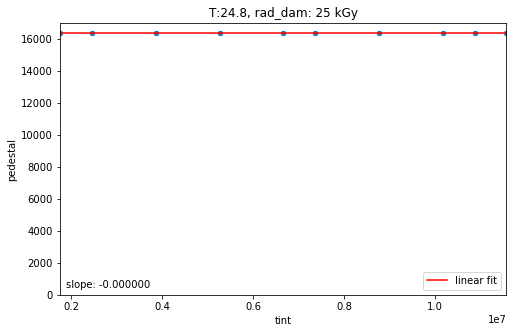

24.8 30
cut=0


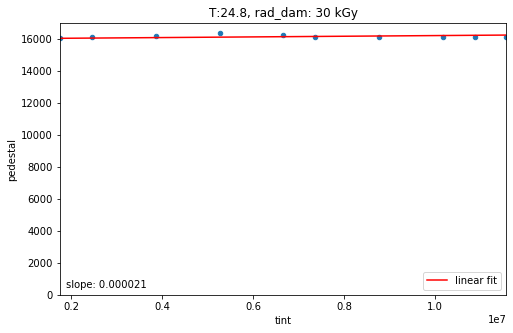

24.8 35
cut=0


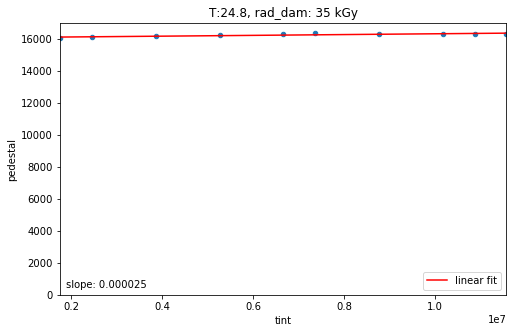

24.8 40
cut=0


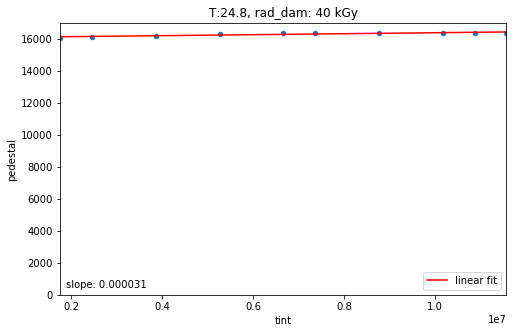

24.8 45
cut=0


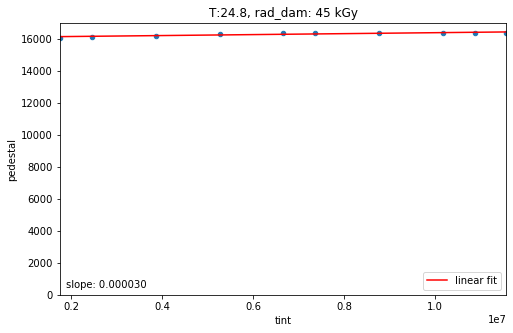

24.8 50
cut=0


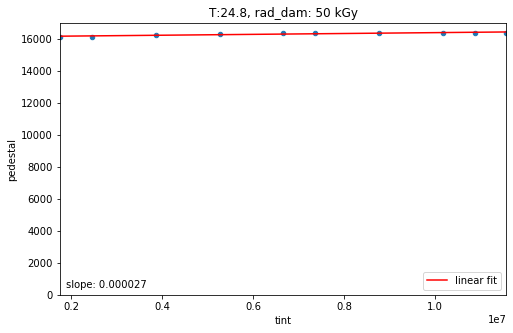

30.0 1
cut>2


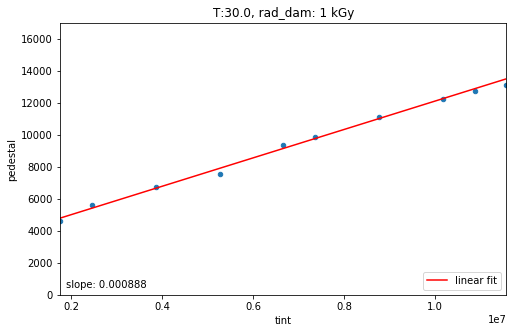

30.0 2
cut>2


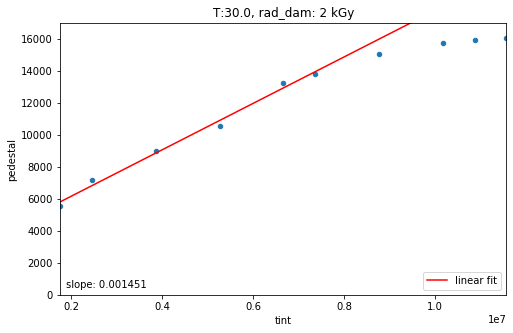

30.0 3
cut>2


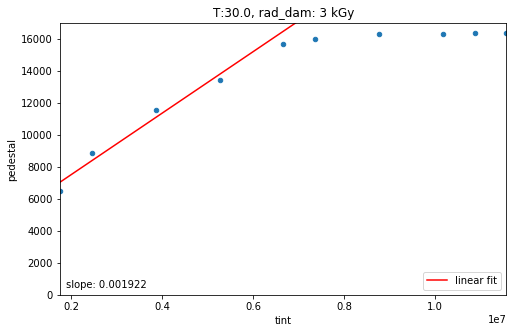

30.0 4
cut>2


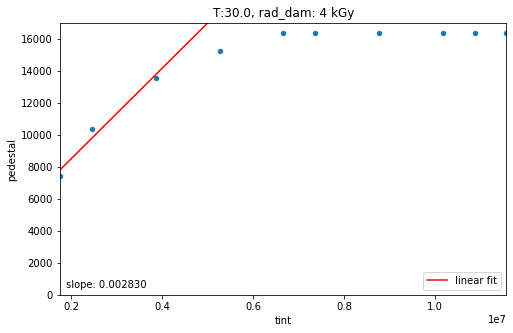

30.0 5
cut>2


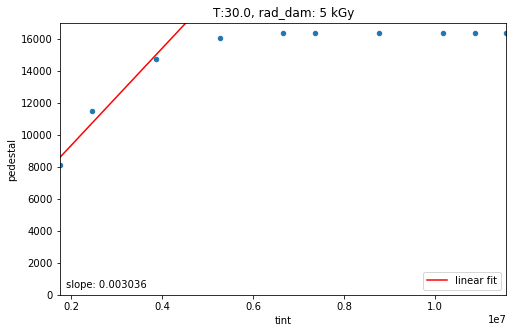

30.0 6
cut=2


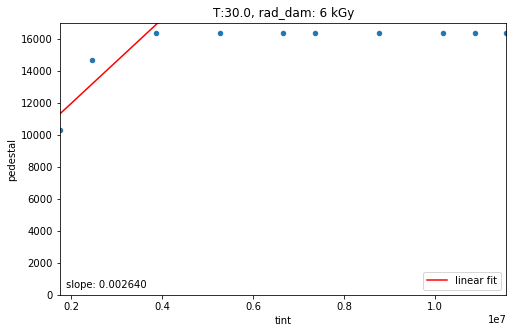

30.0 8
cut=1
[11952.4523625 16022.9440625 16380.9162375 16382.4118375 16382.46615
 16382.636525  16382.6806375 16382.6869625 16382.6973125 16382.7032875]


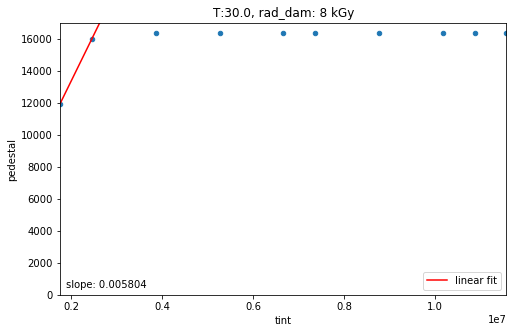

30.0 9
cut=1
[12338.1934875 16203.36455   16377.41395   16377.425425  16377.7707125
 16378.201675  16378.2411875 16378.28735   16378.2958875 16378.350825 ]


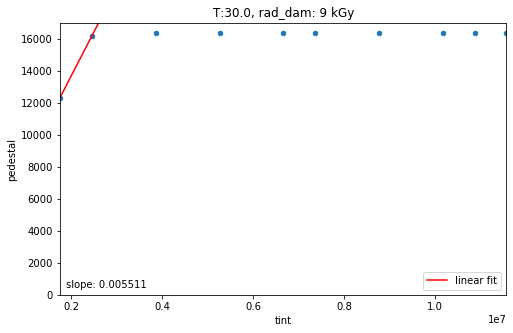

30.0 10
cut=1
[12836.580925  16345.812475  16378.7690625 16379.0256875 16379.14195
 16379.2377375 16379.26285   16379.2971875 16379.3344875 16379.3452875]


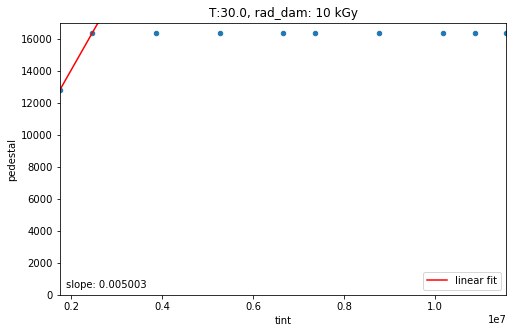

30.0 12
cut=0


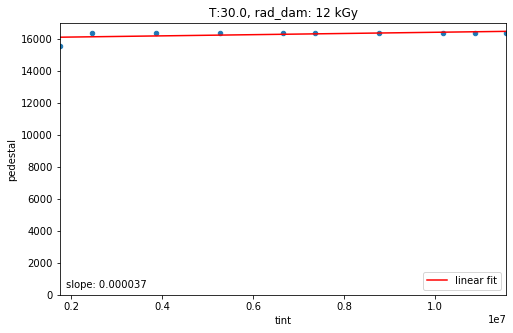

30.0 14
cut=0


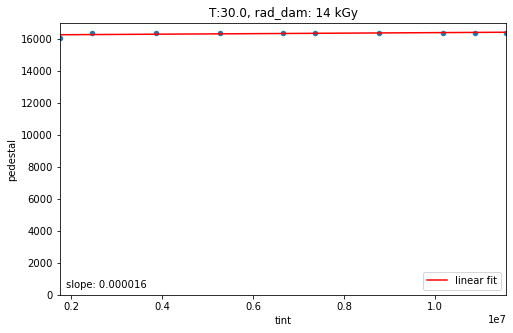

30.0 16
cut=0


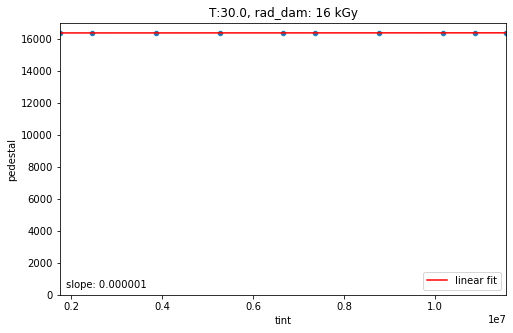

30.0 18
cut=0


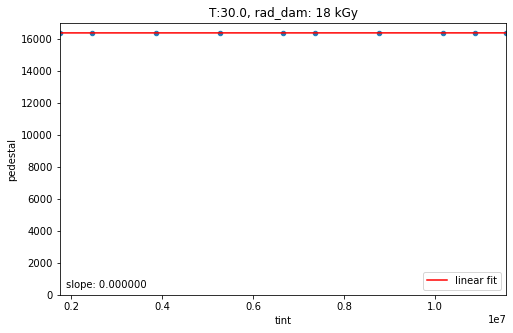

30.0 20
cut=0


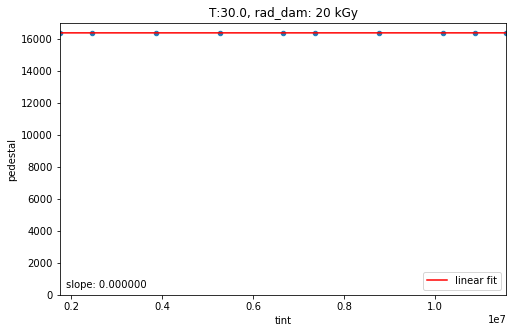

30.0 25
cut=0


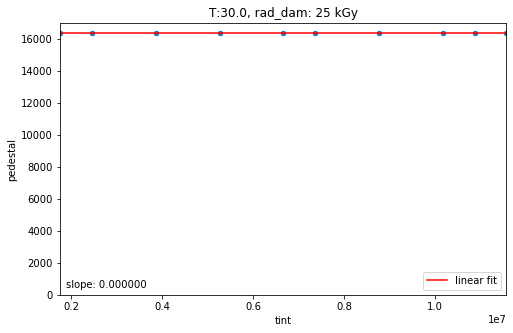

30.0 30
cut=0


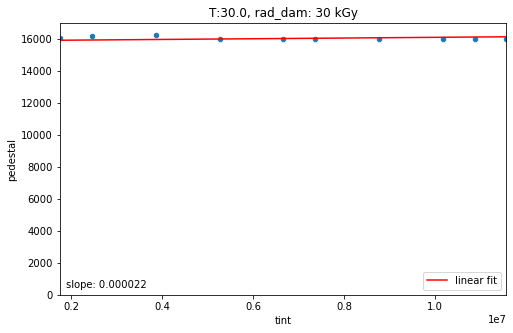

30.0 35
cut=0


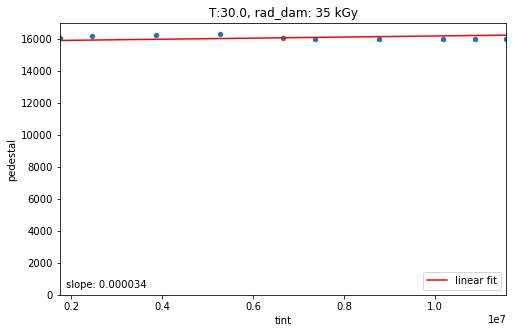

30.0 40
cut=0


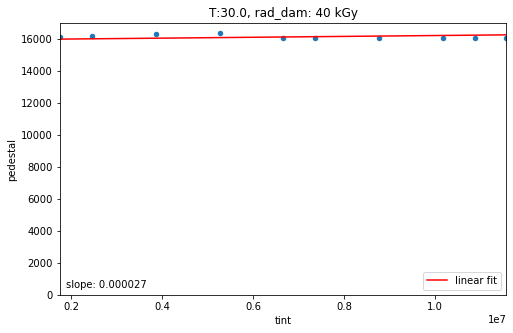

30.0 45
cut=0


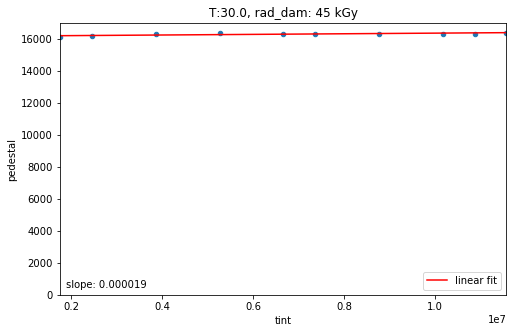

30.0 50
cut=0


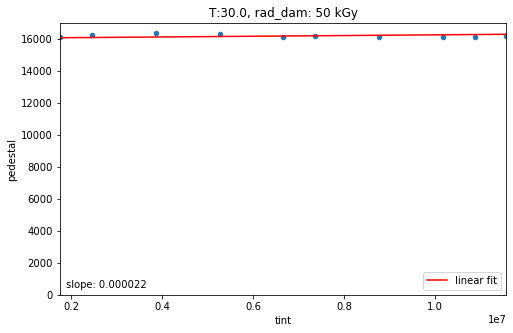

In [38]:
slopes = []
slope_err = []
temperatures = []
radiations = []
for (T, r), group in df.groupby(['T', 'rad_dam']):

    xx = np.sort(np.array(group['tint']))
    yy = np.sort(np.array(group['pedestal']))
    cut = select_fit(yy)

    if T>-30 and r >0:
        print(T,r)
        if cut>2:
            print('cut>2')
            #pass
            #"""
            group.plot.scatter(x='tint', y = 'pedestal', 
                           title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                          ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
            p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
            y_fit = p[0]*xx + p[1]

            plt.plot(xx, y_fit,c='red', label='linear fit')
            plt.legend(loc='lower right')
            slope=p[0]
            plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
            #"""
        elif cut ==2:
            print('cut=2')
            #pass
            #"""
            #print(T, r, cut, np.max(yy))

            group.plot.scatter(x='tint', y = 'pedestal', 
                           title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                          ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
            p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
            y_fit = p[0]*xx + p[1]

            plt.plot(xx, y_fit,c='red', label='linear fit')
            plt.legend(loc='lower right')
            slope=p[0]
            plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
            #"""

        elif cut==1:
            print('cut=1')
            #pass
            #"""
            #print(T, r, cut, np.max(yy),xx[:cut], yy[:cut])

            group.plot.scatter(x='tint', y = 'pedestal', 
                           title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                          ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
            
            print(yy)
            x1 = xx[0]
            x2 = xx[1]
            
            y1 = yy[0]
            y2 = yy[1]
            m = (y1-y2)/(x1-x2)
            q = (x1*y2 - x2*y1)/(x1-x2)
            y_fit = m * xx + q
            slope = m
            plt.plot(xx, y_fit,c='red', label='linear fit')
            plt.legend(loc='lower right')
            plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
            #"""

        elif cut==0:
            print('cut=0')
            #pass
            #"""
            #print(T, r, cut, np.max(yy))
            group.plot.scatter(x='tint', y = 'pedestal', 
                           title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                          ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
            p, V = np.polyfit(xx, yy, 1, cov=True)
            y_fit = p[0]*xx + p[1]
            slope = p[0]
            plt.plot(xx, y_fit,c='red', label='linear fit')
            plt.legend(loc='lower right')
            plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
            #"""
        else:

            print('problem')
        slopes.append(slope)
        #slope_err.append(V[0][0])
        temperatures.append(T)
        radiations.append(r)

        plt.show()

In [39]:
def get_variables(df, skip=None):
    slopes = []
    slope_errs = []
    inter_errs = []
    temperatures = []
    radiations = []
    intercepts = []
    for (T, r), group in df.groupby(['T', 'rad_dam']):

        xx = np.sort(np.array(group['tint']))
        yy = np.sort(np.array(group['pedestal']))
        cut = select_fit(yy)
        slope=None
        intercept=None

        if cut>2:
            
            p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
            y_fit = p[0]*xx + p[1]
            intercept = p[1]
            slope=p[0]
            slope_err = V[0][0]
            inter_err = V[0][1]
        elif cut ==2:
            if skip:
                pass
            else:
                p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
                y_fit = p[0]*xx + p[1]

                slope=p[0]
                intercept=p[1]
                slope_err = V[0][0]
                inter_err = V[0][1]
        elif cut==1:
            if skip:
                pass
            else:
                x1 = xx[0]
                x2 = xx[1]
                y1 = yy[0]
                y2 = yy[1]
                m = (y1-y2)/(x1-x2)
                q = (x1*y2 - x2*y1)/(x1-x2)
                y_fit = m * xx + q
                slope = m
                intercept=q
                slope_err = 0
                inter_err = 0
        elif cut==0:
            if skip:
                pass
                #print(T, r, cut, np.max(yy))
            else:
                p, V = np.polyfit(xx, yy, 1, cov=True)
                y_fit = p[0]*xx + p[1]
                slope = p[0]
                intercept = p[1]
                slope_err = V[0][0]
                inter_err = V[0][1]

        print(T,r, cut, slope)


        slopes.append(slope)
        slope_errs.append(slope_err)
        inter_errs.append(inter_err)
        temperatures.append(T)
        radiations.append(r)
        intercepts.append(intercept)
        #plt.show()
    #    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
        #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))

    radiations = np.array(radiations)
    temperatures = np.array(temperatures)
    slopes = np.array(slopes)
    intercepts = np.array(intercepts)
    slope_errs = np.array(slope_errs)
    inter_errs = np.array(inter_errs)
    
    return radiations, temperatures, slopes, intercepts, slope_errs, inter_errs

In [40]:
radiations, temperatures, slopes, intercepts, slope_errs, inter_errs = get_variables(df, skip=True) 

-20.0 1 12 4.898678068228133e-06
-20.0 2 12 8.870279654125647e-06
-20.0 3 12 1.875279579531662e-05
-20.0 4 12 1.383770102601041e-05
-20.0 5 12 2.1084254450953204e-05
-20.0 6 12 3.182024463594906e-05
-20.0 8 12 3.8841289916807815e-05
-20.0 9 12 4.055865077963743e-05
-20.0 10 12 4.52622196526189e-05
-20.0 12 12 6.732899080291389e-05
-20.0 14 12 7.082455864245545e-05
-20.0 16 12 7.895221803483347e-05
-20.0 18 12 8.719055380248609e-05
-20.0 20 12 9.098704104581101e-05
-20.0 25 12 0.00013694027950309658
-20.0 30 12 0.0001615659579866826
-20.0 35 12 0.00016653100558208482
-20.0 40 12 0.00018880996417418725
-20.0 45 12 0.0001947382922344701
-20.0 50 12 0.00021887644658987991
-15.0 1 10 1.0716502416364453e-05
-15.0 2 10 1.462730536504395e-05
-15.0 3 10 2.5206843009061286e-05
-15.0 4 10 3.202238088812498e-05
-15.0 5 10 3.826523886588608e-05
-15.0 6 10 5.973649879538941e-05
-15.0 8 10 7.226476755273182e-05
-15.0 9 10 7.443349643323325e-05
-15.0 10 10 7.870916879190853e-05
-15.0 12 10 0.000122140

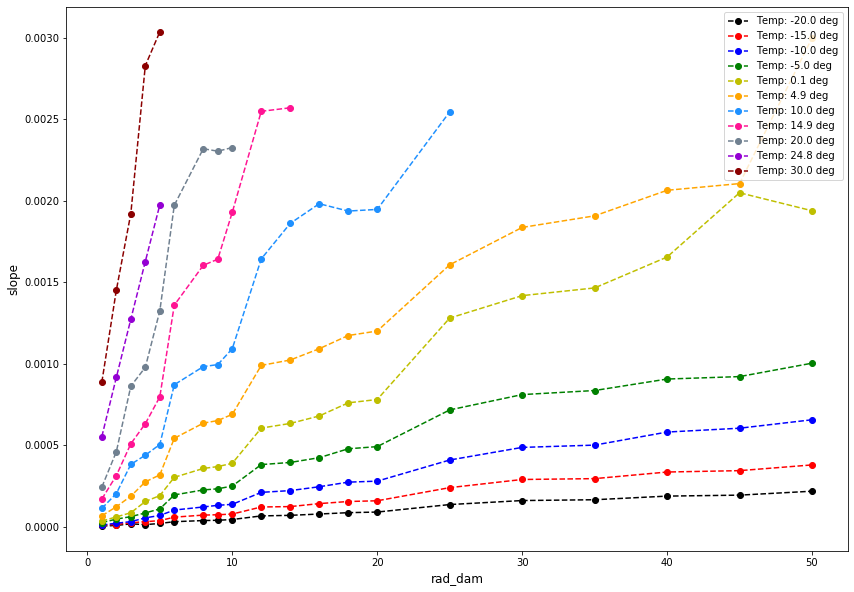

In [41]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.savefig('Slope_vs_T_rad_dam'.format(r))

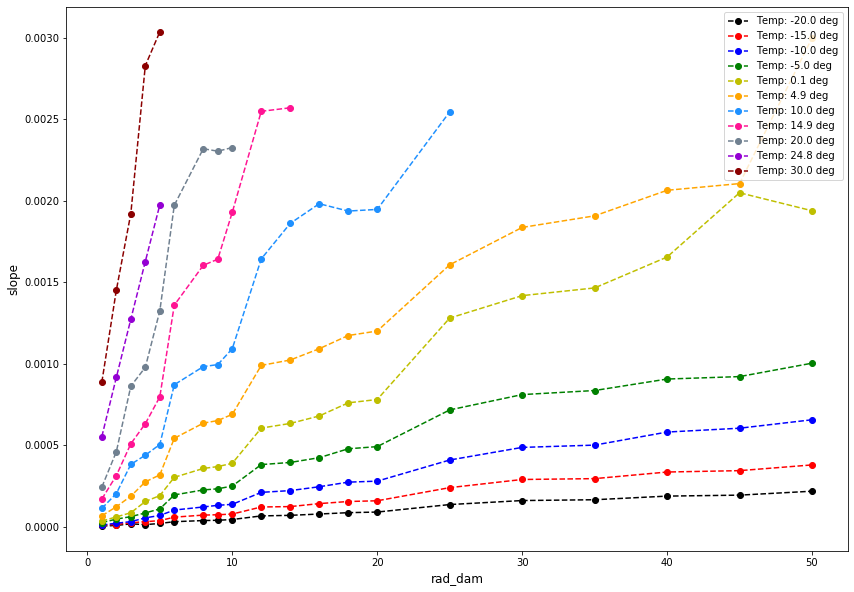

In [16]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.savefig('Slope_vs_T_rad_dam'.format(r))